# 1.DATA CLEANING- DATA WRANGLING

In [11]:
#Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
%matplotlib inline

In [12]:
#Loading,reading and storing dataset
df = pd.read_csv('marketing_data.csv')

In [13]:
#Review of data fields
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


### Understanding data   
ID=Customer's unique identifier   
Year_Birth=Customer's birth year   
Education=Customer's education level   
Marital_Status=Customer's marital status   
Income=Customer's yearly household income   
Kidhome=Number of children in customer's household   
Teenhome=Number of teenagers in customer's household   
Dt_Customer=Date of customer's enrollment with the company   
Recency=Number of days since customer's last purchase   
MntWines=Amount spent on wine in the last 2 years   
MntFruits=Amount spent on fruits in the last 2 years   
MntMeatProducts=Amount spent on meat in the last 2 years   
MntFishProducts=Amount spent on fish in the last 2 years   
MntSweetProducts=Amount spent on sweets in the last 2 years   
MntGoldProds=Amount spent on gold in the last 2 years   
NumDealsPurchases=Number of purchases made with a discount   
NumWebPurchases=Number of purchases made through the company's web site   
NumCatalogPurchases=Number of purchases made using a catalogue   
NumStorePurchases=Number of purchases made directly in stores   
NumWebVisitsMonth=Number of visits to company's web site in the last month   
AcceptedCmp3=1 if customer accepted the offer in the 3rd campaign, 0 otherwise   
AcceptedCmp4=1 if customer accepted the offer in the 4th campaign, 0 otherwise   
AcceptedCmp5=1 if customer accepted the offer in the 5th campaign, 0 otherwise   
AcceptedCmp1=1 if customer accepted the offer in the 1st campaign, 0 otherwise   
AcceptedCmp2=1 if customer accepted the offer in the 2nd campaign, 0 otherwise   
Response=1 if customer accepted the offer in the last campaign, 0 otherwise   
Complain=1 if customer complained in the last 2 years, 0 otherwise   
Country=Customer's location   

In [14]:
#Show the DataFrame's shape
df.shape

(2240, 28)

In [15]:
 # Standardize column names
df.columns=[e.lower().replace(' ', '') for e in df.columns]  
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   year_birth           2240 non-null   int64 
 2   education            2240 non-null   object
 3   marital_status       2240 non-null   object
 4   income               2216 non-null   object
 5   kidhome              2240 non-null   int64 
 6   teenhome             2240 non-null   int64 
 7   dt_customer          2240 non-null   object
 8   recency              2240 non-null   int64 
 9   mntwines             2240 non-null   int64 
 10  mntfruits            2240 non-null   int64 
 11  mntmeatproducts      2240 non-null   int64 
 12  mntfishproducts      2240 non-null   int64 
 13  mntsweetproducts     2240 non-null   int64 
 14  mntgoldprods         2240 non-null   int64 
 15  numdealspurchases    2240 non-null   int64 
 16  numweb

We have 18 numerical variables and 10 categorical variables: Education, Marital_Status, AcceptedCmp1-AcceptedCmp5,Response, Country and Complain

In [17]:
#Transformon income to numerical
df['income'] = df['income'].str.replace('$', '')
df['income'] = df['income'].str.replace(',', '').astype('float')

C:\Users\danie\AppData\Local\Temp\ipykernel_26540\1407881261.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace('$', '')


In [18]:
#Transformon AcceptedCmp1-5, Respomnse, Complain to object
df['acceptedcmp1'] = df['acceptedcmp1'].astype(str)
df['acceptedcmp2'] = df['acceptedcmp2'].astype(str)
df['acceptedcmp3'] = df['acceptedcmp3'].astype(str)
df['acceptedcmp4'] = df['acceptedcmp3'].astype(str)
df['acceptedcmp5'] = df['acceptedcmp5'].astype(str)
df['response'] = df['response'].astype(str)
df['complain'] = df['complain'].astype(str)

In [19]:
#Checking unique values of dataset
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos de la columna '{column}':")
    print(unique_values)
    print()


Valores únicos de la columna 'id':
[ 1826     1 10476 ...    22   528  4070]

Valores únicos de la columna 'year_birth':
[1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1893 1996 1995 1899 1943
 1941 1940 1900]

Valores únicos de la columna 'education':
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Valores únicos de la columna 'marital_status':
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

Valores únicos de la columna 'income':
[84835. 57091. 67267. ... 46310. 65819. 94871.]

Valores únicos de la columna 'kidhome':
[0 1 2]

Valores únicos de la columna 'teenhome':
[0 1 2]

Valores únicos de la columna 'dt_customer':
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13

In [20]:
#Checking for duplicate rows in the data to remove if any
df.duplicated().sum()

0

In [21]:
##hecking null values, I will remove columns have more than 75%
df.isnull().sum().sort_values(ascending=False)


income                 24
id                      0
numdealspurchases       0
complain                0
response                0
acceptedcmp2            0
acceptedcmp1            0
acceptedcmp5            0
acceptedcmp4            0
acceptedcmp3            0
numwebvisitsmonth       0
numstorepurchases       0
numcatalogpurchases     0
numwebpurchases         0
mntgoldprods            0
year_birth              0
mntsweetproducts        0
mntfishproducts         0
mntmeatproducts         0
mntfruits               0
mntwines                0
recency                 0
dt_customer             0
teenhome                0
kidhome                 0
marital_status          0
education               0
country                 0
dtype: int64

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


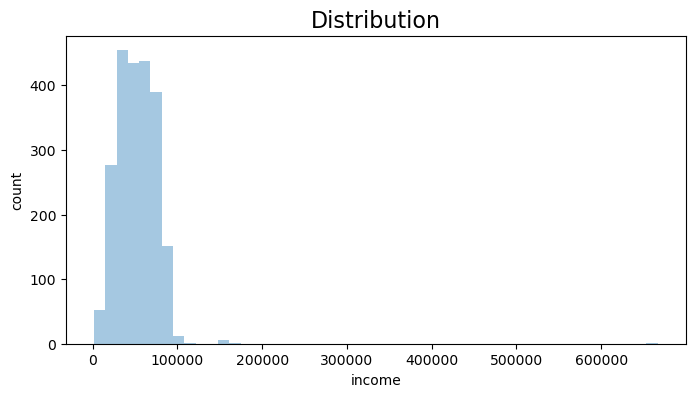

In [22]:
#Plot Income variable to identify best strategy for imputation
plt.figure(figsize=(8,4))
sns.distplot(df['income'], kde=False, hist=True)
plt.title('Distribution', size=16)
plt.ylabel('count');

Findings:

- Plot shows that most incomes are distributed between 0-100.000$ with a few outliers.

Choosing the median as the imputation strategy is a common approach when dealing with skewed distributions or the presence of outliers. The median is robust to outliers because it is not affected by extreme values, unlike the mean. By using the median, the imputed values will be representative of the central tendency of the non-null income values and provide a more accurate estimation compared to the mean. This provides a better approximation of the actual values and helps maintain the integrity and quality of the data.

<AxesSubplot:>

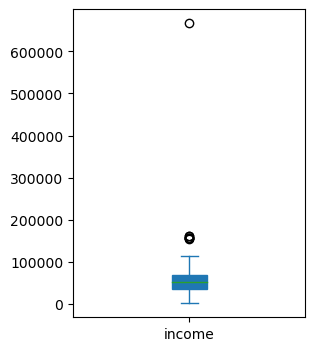

In [23]:
df['income'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [24]:
#Impute null values in Income with median value (to avoid skewing of the mean due to outliers):
df['income'] = df['income'].fillna(df['income'].median())

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


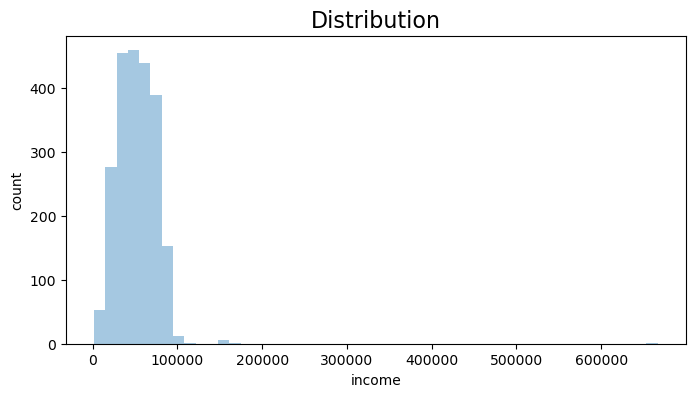

In [25]:
plt.figure(figsize=(8,4))
sns.distplot(df['income'], kde=False, hist=True)
plt.title('Distribution', size=16)
plt.ylabel('count');

## DEALING WITH OUTLIERS

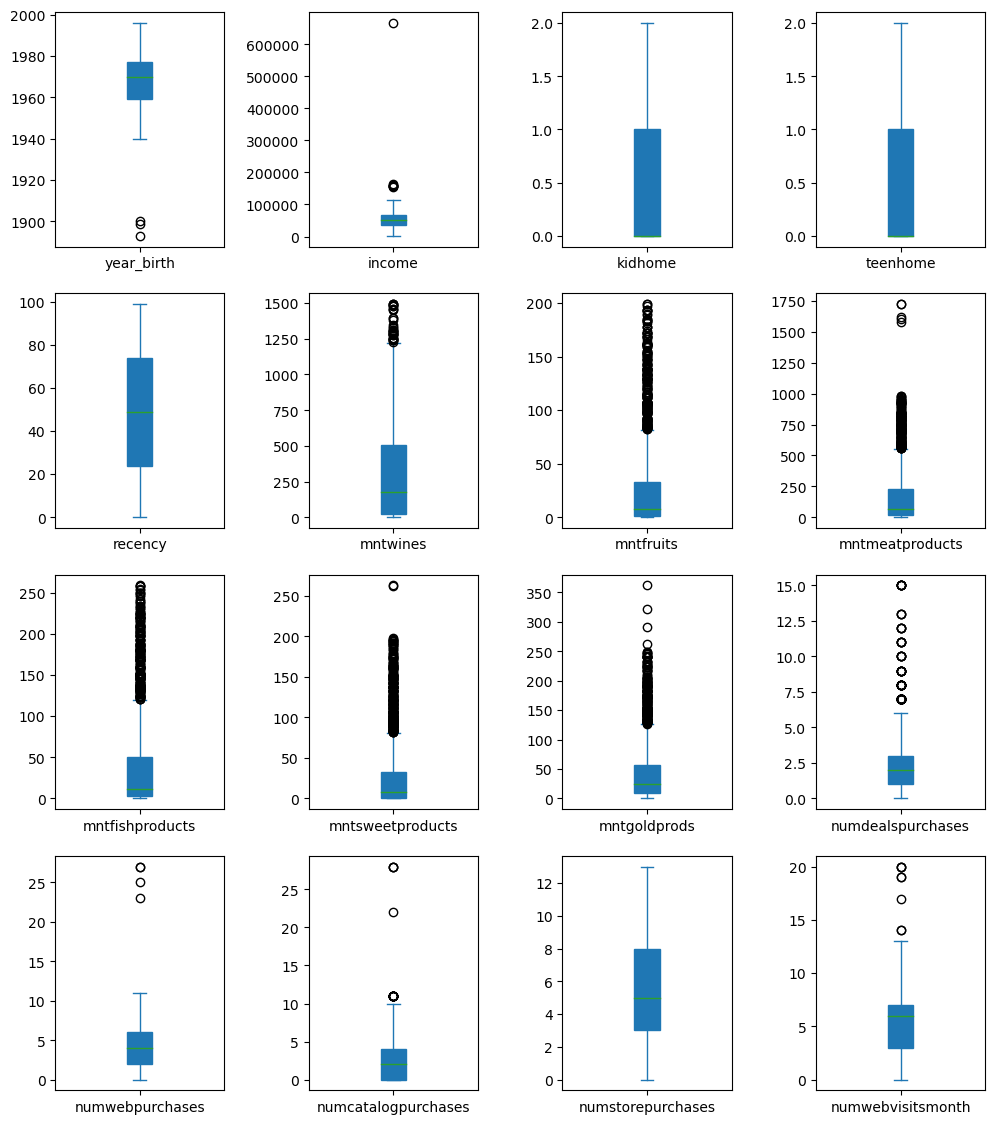

In [26]:
#PLot outliers of numerical data

plt.show()# select columns to plot
df_to_plot = df.drop(columns=['id', 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'response', 'complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Multiple features contain outliers (see boxplots below), but the only that likely indicate data entry errors are Year_Birth <= 1900

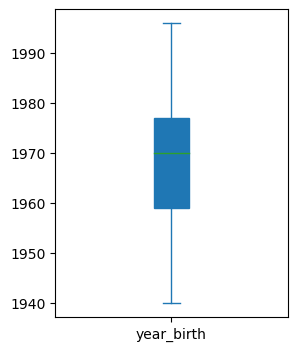

In [27]:
#Remove rows where Year_Birth <= 1900
df = df[df['year_birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
df['year_birth'].plot(kind='box', patch_artist=True);


## Outliers Income column

We identify Income outliers and then exclude them from the data frame

In [28]:
Q1 = df.income.quantile(0.25)
Q3 = df.income.quantile(0.75)
IQR = Q3 - Q1

income_outliers = df[df.income > Q3 + 1.5*IQR]
df = df[df.income < Q3 + 1.5*IQR]
income_outliers.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
325,4931,1977,Graduation,Together,157146.0,0,0,4/29/13,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA
497,1501,1982,PhD,Married,160803.0,0,0,8/4/12,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US
526,9432,1977,Graduation,Together,666666.0,1,0,6/2/13,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,SA
730,1503,1976,PhD,Together,162397.0,1,1,6/3/13,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,SP
851,5336,1971,Master,Together,157733.0,1,0,6/4/13,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,SP


C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


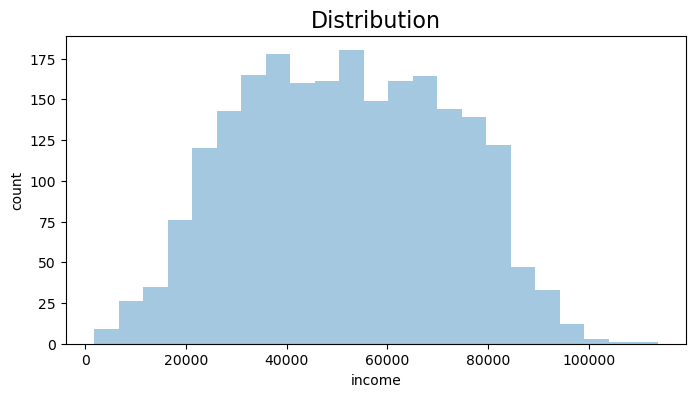

In [29]:
plt.figure(figsize=(8,4))
sns.distplot(df['income'], kde=False, hist=True)
plt.title('Distribution', size=16)
plt.ylabel('count');

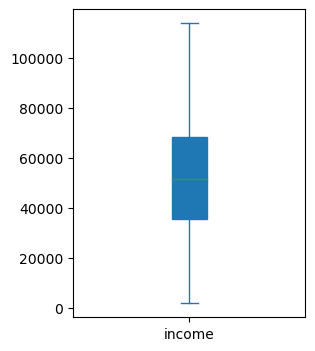

In [30]:
 plt.figure(figsize=(3,4))
df['income'].plot(kind='box', patch_artist=True);

In [31]:
#Counting outliers for each colum

for column in df_to_plot:
    q1 = np.percentile(df_to_plot[column], 25)
    q3 = np.percentile(df_to_plot[column], 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    num_outliers = ((df_to_plot[column] < lower_bound) | (df_to_plot[column] > upper_bound)).sum()

    print("Column '{}': {}".format(column, num_outliers))

Column 'year_birth': 3
Column 'income': 8
Column 'kidhome': 0
Column 'teenhome': 0
Column 'recency': 0
Column 'mntwines': 35
Column 'mntfruits': 227
Column 'mntmeatproducts': 175
Column 'mntfishproducts': 223
Column 'mntsweetproducts': 248
Column 'mntgoldprods': 207
Column 'numdealspurchases': 86
Column 'numwebpurchases': 4
Column 'numcatalogpurchases': 23
Column 'numstorepurchases': 0
Column 'numwebvisitsmonth': 8


In [32]:
#Counting percentage of outliers

for column in df_to_plot:
    q1 = np.percentile(df_to_plot[column], 25)
    q3 = np.percentile(df_to_plot[column], 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = ((df_to_plot[column] < lower_bound) | (df_to_plot[column] > upper_bound))
    num_outliers = outliers.sum()
    percentage = (num_outliers / len(df_to_plot[column])) * 100

    print("Column '{}': {:.2f}%".format(column, percentage))

Column 'year_birth': 0.13%
Column 'income': 0.36%
Column 'kidhome': 0.00%
Column 'teenhome': 0.00%
Column 'recency': 0.00%
Column 'mntwines': 1.56%
Column 'mntfruits': 10.13%
Column 'mntmeatproducts': 7.81%
Column 'mntfishproducts': 9.96%
Column 'mntsweetproducts': 11.07%
Column 'mntgoldprods': 9.24%
Column 'numdealspurchases': 3.84%
Column 'numwebpurchases': 0.18%
Column 'numcatalogpurchases': 1.03%
Column 'numstorepurchases': 0.00%
Column 'numwebvisitsmonth': 0.36%


We are going to work on the predictions with the rest of the ouliers since once we segment the clients to make the predictions we can lose a lot of data and this could invalidate the model. Once we get the first results we can test the model without outliers.

In [33]:
#Transform yaer_birth and dt_customer into date format
df['year_birth'] = pd.to_datetime(df['year_birth'], format='%Y')
df['dt_customer'] = pd.to_datetime(df['dt_customer'])

In [34]:
#Transform yaer_birth and dt_customer into date format

## Feature engineering

Having a first look at the row data enables us to start thinking at some useful variables we could create in order to better understand our dataset and reveal precious information.

We will create several variables :

- Variable Age in replacement of the variable Year_birth
- Variable Spending as the sum of the amount spent on the product categories
- Variable Marital_Situation to group the different marital status in only 2 comprehensive categories : Couple(Married or Together) vs Alone (Divorced' 'Single', 'Widow' 'YOLO' 'Alone' 'Absurd'
- Variable dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'
- The year of becoming a customer ('Year_Customer') can be engineered from 'Dt_Customer'
- The total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'
- The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)


We will remove the unused variables for this analysis

In [35]:
counts = df['marital_status'].value_counts()
print(counts)

Married     861
Together    575
Single      479
Divorced    230
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: marital_status, dtype: int64


In [36]:
#Age
df['age'] = datetime.now().year - df['year_birth'].dt.year

# Spending
mnt_cols = [col for col in df.columns if 'mnt' in col]
df['spending'] = df[mnt_cols].sum(axis=1)

#Marital Status

# Create a mapping dictionary for states

estado_mapeo = {
    'Divorced': 'single',
    'Single': 'single',
    'Married': 'couple',
    'Together': 'couple',
    'Widow':'single',
    'YOLO':'single',
    'Alone':'single',
    'Absurd':'single',
}

# Apply mapping to 'marital_status' column
df['marital_status'] = df['marital_status'].map(estado_mapeo)


# Dependents
df['dependents'] = df['kidhome'] + df['teenhome']

# Year becoming a Customer
df['year_customer'] = pd.DatetimeIndex(df['dt_customer']).year


# Total Purchases
purchases_cols = [col for col in df.columns if 'purchases' in col]
df['total_purchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'cmp' in col] + ['response'] # 'Response' is for the latest campaign
df['total_campaigns_acc'] = df[campaigns_cols].sum(axis=1)


In [37]:
#Drop columns we don´t need
df = df.drop(['year_birth', 'teenhome', 'kidhome','dt_customer'], axis=1)



In [38]:
df.head(3)

,id,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,spending,dependents,year_customer,total_purchases,total_campaigns_acc
0,1826,Graduation,single,84835.0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,1190,0,2014,15,1.0
1,1,Graduation,single,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,577,0,2014,18,11.0
2,10476,Graduation,couple,67267.0,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,65,251,1,2014,11,0.0


In [39]:
#Saving clean df
df.to_csv('marketing_analysis_clean.csv', index=False)


In [40]:
suma_spending = df['spending'].sum()
suma_spending

1349751

In [41]:
fila_cliente_1386 = df[df['id'] == 9365]

# Imprimir la fila seleccionada
print(fila_cliente_1386)

        id education marital_status   income  recency  mntwines  mntfruits  \
1321  9365       PhD         single  60000.0       57      1048          0   

      mntmeatproducts  mntfishproducts  mntsweetproducts  mntgoldprods  \
1321              217                0                 0            12   

      numdealspurchases  numwebpurchases  numcatalogpurchases  \
1321                  5               11                    3   

      numstorepurchases  numwebvisitsmonth acceptedcmp3 acceptedcmp4  \
1321                  5                  6            0            0   

     acceptedcmp5 acceptedcmp1 acceptedcmp2 response complain country  age  \
1321            0            0            0        0        0      SP   47   

      spending  dependents  year_customer  total_purchases  \
1321      1277           1           2012               24   

      total_campaigns_acc  
1321                  0.0  


In [42]:
df.shape

(2229, 30)

### Statistical summary 


In [43]:
df.describe()

,id,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,spending,dependents,year_customer,total_purchases,total_campaigns_acc
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,5589.296097,51619.504262,49.106326,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055,2.319874,4.100045,2.636608,5.812472,5.334231,54.111261,605.541050,0.951996,2013.027367,14.869000,8123.388964
std,3244.840538,20601.216248,28.946476,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255,1.895252,2.775461,2.796161,3.242144,2.414981,11.707430,601.032228,0.751976,0.684966,7.622187,28669.066626
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,2012.000000,0.000000,0.000000
25%,2829.000000,35416.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,46.000000,69.000000,0.000000,2013.000000,8.000000,0.000000
50%,5455.000000,51381.500000,49.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,53.000000,397.000000,1.000000,2013.000000,15.000000,0.000000
75%,8420.000000,68118.000000,74.000000,505.000000,33.000000,231.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,64.000000,1044.000000,1.000000,2013.000000,21.000000,0.000000
max,11191.000000,113734.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,83.000000,2525.000000,3.000000,2014.000000,43.000000,111111.000000


The describe function generates for us asummary, particularly useful as a first step in our preliminary investigation. Analyzing the statistical summary gives us insightful information in one look :   

-**Average income** is 52.227$ while median income is 51.381$. The distribution is right skewed with the possible presence of outliers   
The maximum value is 666.666$ and the 3rd quartile 68.281$ dollars  so we could deduce that the distribution is skewed to the right with the possible presence of outliers.   
-**Average spending** in the last 2 years is 605$ while median spending is 396$.   
-**Average age** is 54 years old and the oldest customer is 83 years old.   
-**Average store purchases** is the highest with 5.794.397 following by average of web purchases with 4.087.170.   
- The highest average spending on products that have been sold in the last two years has been wine (303.995530), meat(166.916853, gold products(43.968708).   
- The campaign with the highest mean response has been Response, which was the last campaign launched.

# EDA

In [44]:
#Split data into categorical and numerical  for exploration 

In [45]:
df_cat=df.select_dtypes(include=['object'])
df_cat.head(5)

,education,marital_status,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
0,Graduation,single,0,0,0,0,0,1,0,SP
1,Graduation,single,0,0,0,0,1,1,0,CA
2,Graduation,couple,0,0,0,0,0,0,0,US
3,Graduation,couple,0,0,0,0,0,0,0,AUS
4,Graduation,single,1,1,0,0,0,1,0,SP


In [46]:
#Save numerical data
df_num= df.select_dtypes(exclude=["object"])
df_num.head(3)

,id,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,spending,dependents,year_customer,total_purchases,total_campaigns_acc
0,1826,84835.0,0,189,104,379,111,189,218,1,4,4,6,1,53,1190,0,2014,15,1.0
1,1,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,62,577,0,2014,18,11.0
2,10476,67267.0,0,134,11,59,15,2,30,1,3,2,5,2,65,251,1,2014,11,0.0


## CUSTOMER PROFILE ANALYSIS

There are columsn relevant for customer profile:
Education:ordinal
Incomo:continuos
Marital:nominal

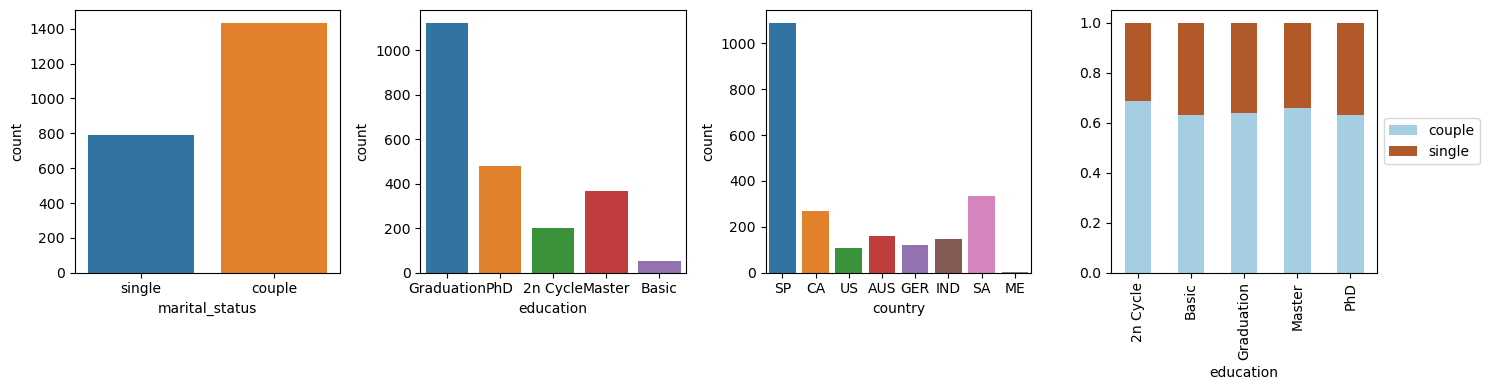

In [47]:
#Displaying categorical data

fig, ax = plt.subplots(1, 4, figsize=(15, 4))

sns.countplot(x=df_cat['marital_status'], ax=ax[0])
sns.countplot(x=df_cat['education'], ax=ax[1])
sns.countplot(x=df_cat['country'], ax=ax[2])


df_plot = df_cat.groupby(['marital_status', 'education']).size().reset_index().pivot(columns='marital_status', index='education', values=0)
df_plot.apply(lambda x: x / x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[3], colormap='Paired')
ax[3].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


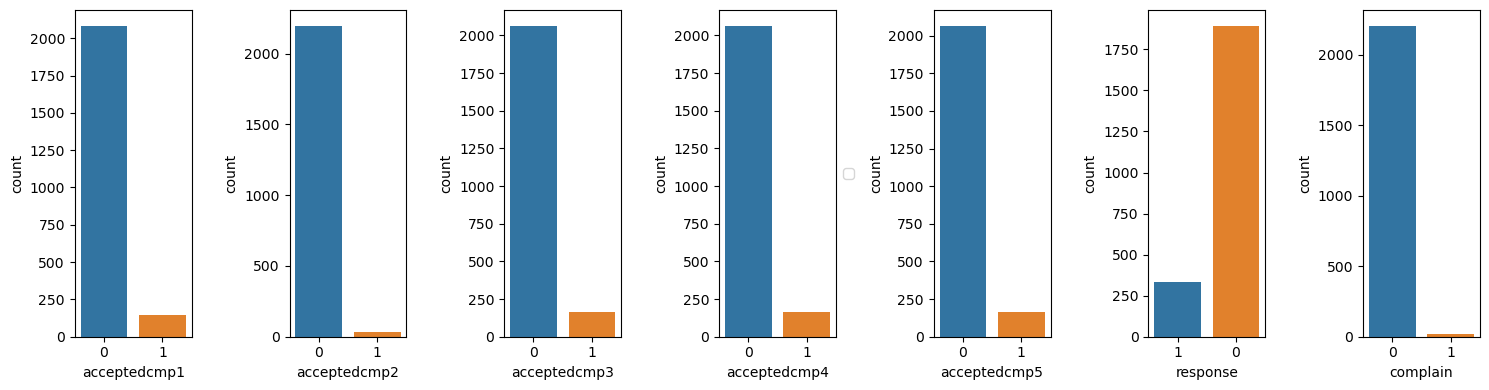

In [48]:
fig, ax = plt.subplots(1, 7, figsize=(15, 4))

sns.countplot(x=df_cat['acceptedcmp1'], ax=ax[0])
sns.countplot(x=df_cat['acceptedcmp2'], ax=ax[1])
sns.countplot(x=df_cat['acceptedcmp3'], ax=ax[2])
sns.countplot(x=df_cat['acceptedcmp4'], ax=ax[3])
sns.countplot(x=df_cat['acceptedcmp5'], ax=ax[4])
sns.countplot(x=df_cat['response'], ax=ax[5])
sns.countplot(x=df_cat['complain'], ax=ax[6])

ax[3].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

## Association between marital status and education

In [49]:
df_cat_con= df_cat[['marital_status', 'education']]
df_cat_con

,marital_status,education
0,single,Graduation
1,single,Graduation
2,couple,Graduation
3,couple,Graduation
4,single,Graduation
...,...,...
2232,single,PhD
2233,couple,2n Cycle
2234,single,Graduation
2235,couple,Graduation


In [50]:
from scipy.stats import chi2_contingency
# Crear la tabla de contingencia
contingency_table= pd.crosstab(df_cat_con['marital_status'], df_cat_con['education'])

# Realizar la prueba de chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Mostrar la tabla de contingencia
print(contingency_table)

# Mostrar el valor de chi-cuadrado y el valor p
print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")

education       2n Cycle  Basic  Graduation  Master  PhD
marital_status                                          
couple               138     34         717     243  304
single                63     20         407     126  177
Chi-cuadrado: 2.4612027478482332
Valor p: 0.651596254517518


The result obtained indicates that the chi-square value is approximately 2.461 and the p-value is approximately 0.6516.

The chi-square value is a measure of the association between the variables "marital_status" (marital status) and "education" (education) in your data set. A larger chi-square value indicates a stronger association between the variables, while a value close to zero indicates that the variables are independent.

The p-value is the probability of obtaining a chi-square value equal to or more extreme than that observed if the variables were completely independent. In other words, it represents the probability that the association between the variables is simply the result of chance, given the size of the sample.

In your case, the p-value is 0.6516, which means that the probability of getting a chi-square value equal to or more extreme than 2.461 under the null hypothesis (that the variables are independent) is about 0.6516. Generally, if the p-value is greater than a predefined significance level (for example, 0.05), we do not have sufficient evidence to reject the null hypothesis and we can consider the variables to be independent.

Therefore, in this case, the result suggests that there is no significant association between marital status and education level in the data set you are analyzing.

In [51]:
#Displaying numerical dataç
df_num.columns

Index(['id', 'income', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'age', 'spending',
       'dependents', 'year_customer', 'total_purchases',
       'total_campaigns_acc'],
      dtype='object')

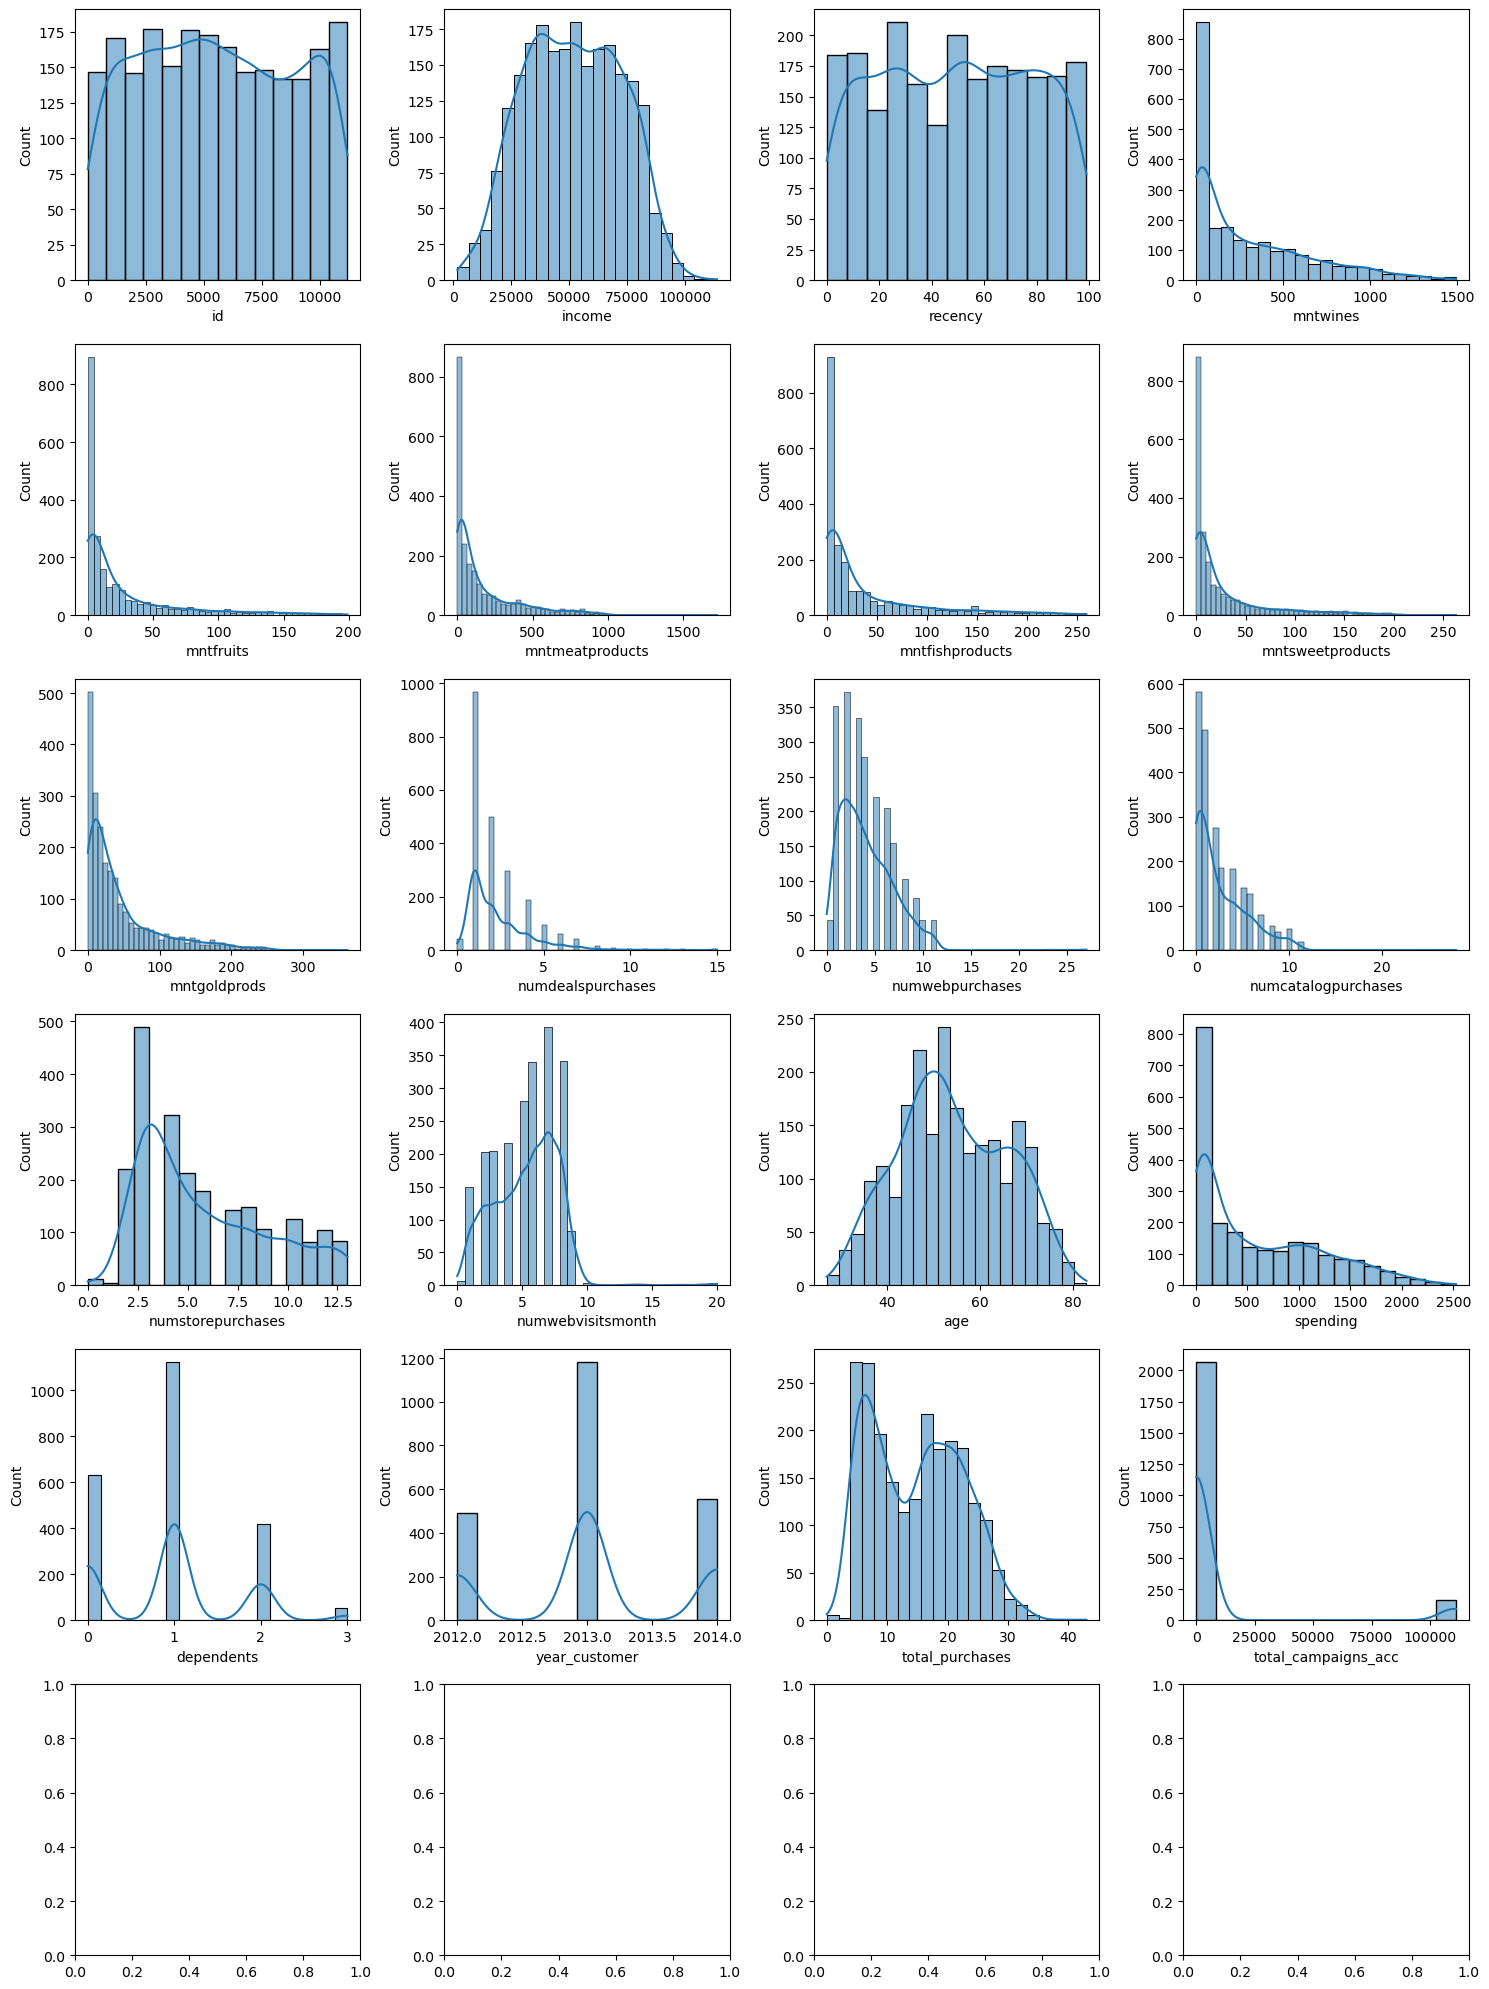

In [52]:
# Crear el lienzo y los ejes
fig, axes = plt.subplots(6, 4, figsize=(15, 20))

# Aplanar el arreglo de ejes para facilitar el acceso
axes = axes.flatten()

# Graficar los histogramas de las columnas numéricas
for i, col in enumerate(df_num.columns):
    sns.histplot(data=df_num, x=col, ax=axes[i], kde=True)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Features Correlation Analysis

Text(0.0, 1.0, 'CORRELATIONS HEATMAP FOR NUMERICAL DATA')

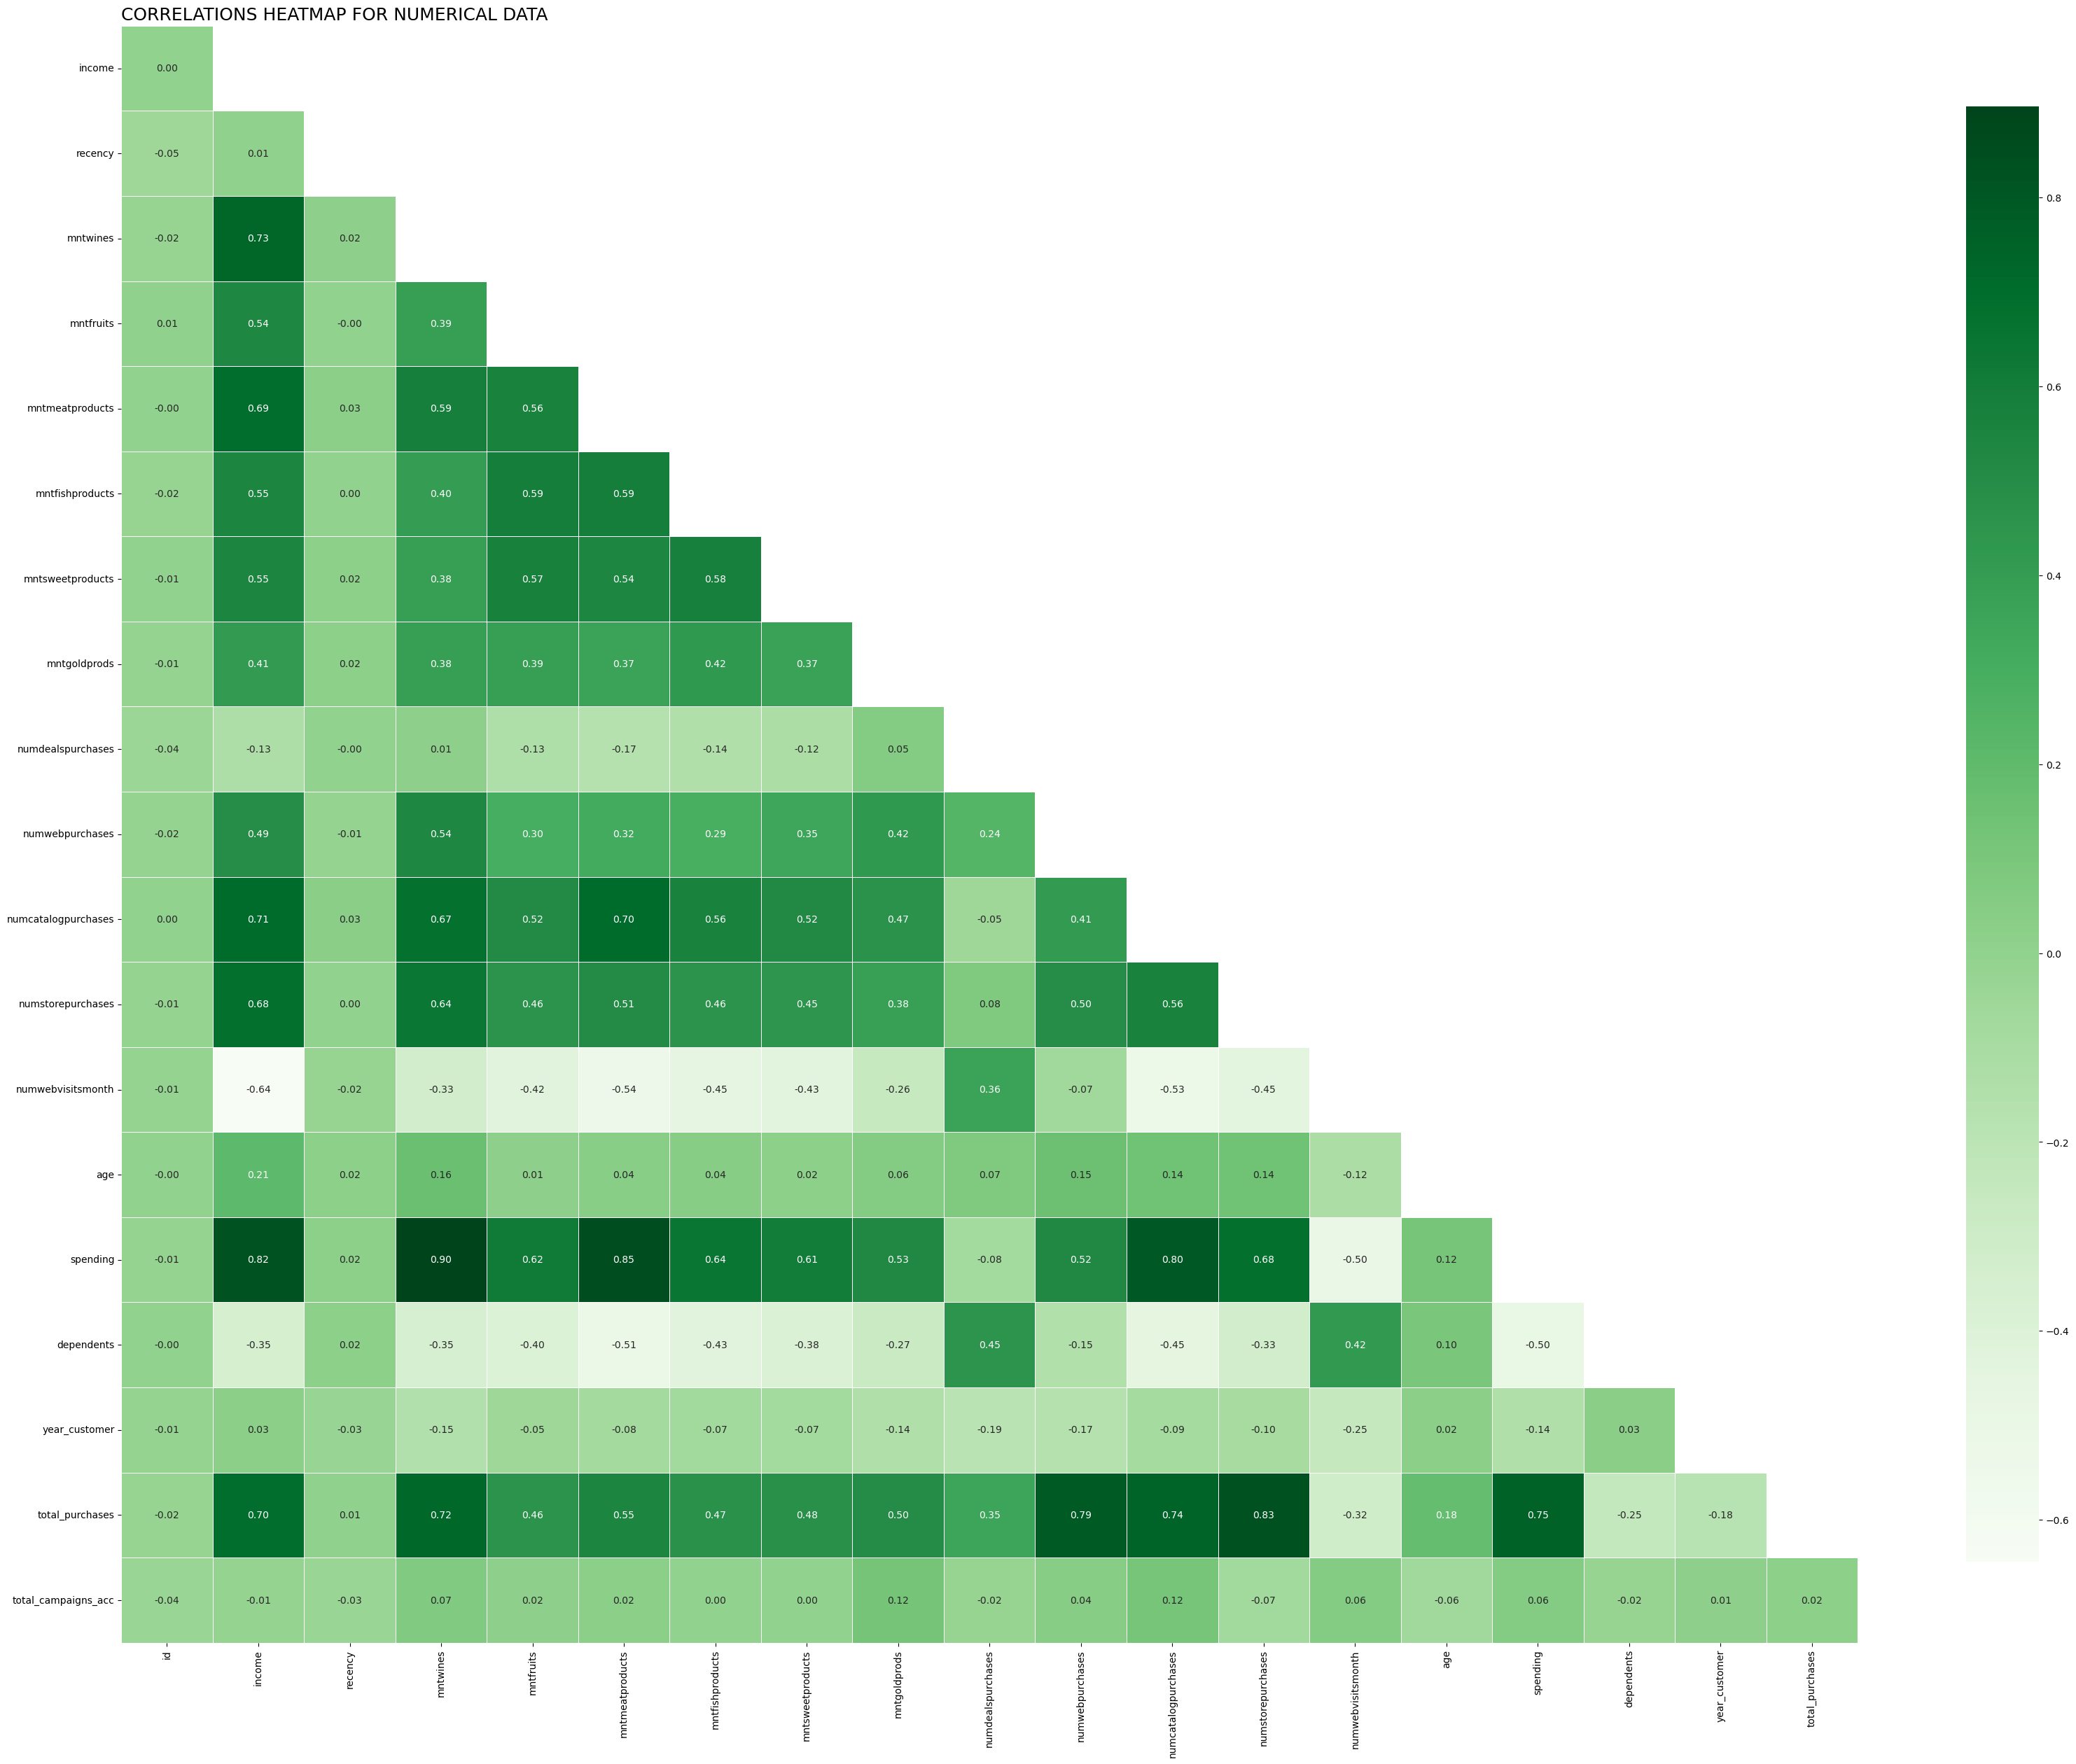

In [53]:
corr = df_num.corr()
ones = np.ones_like(corr, dtype="bool")
mask = np.triu(ones)
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="Greens", linewidths=.6, cbar_kws={"shrink":.9})
ax.xaxis.tick_bottom()
plt.title("Correlations heatmap for numerical data".upper(), fontdict={"fontsize": 18}, loc="left")

<AxesSubplot:>

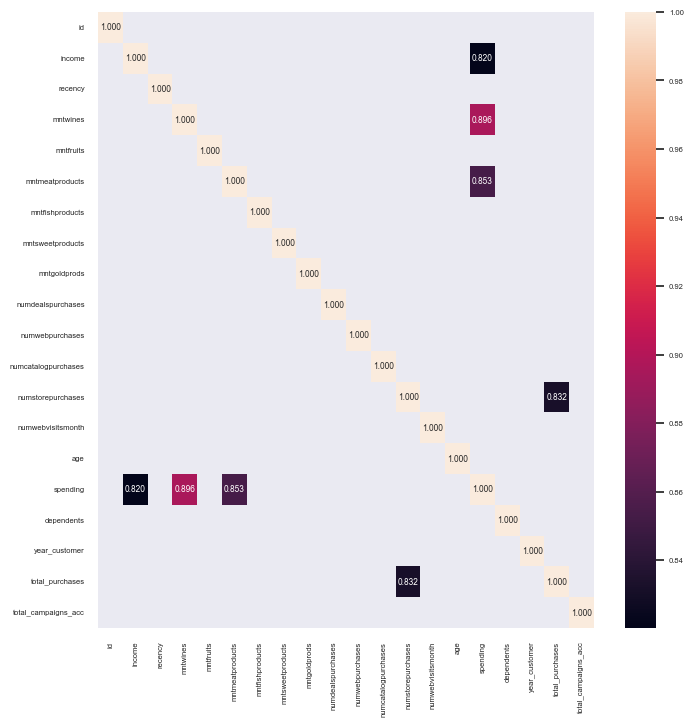

In [67]:
sns.set(rc ={'figure.figsize':(8,8)}, font_scale=0.5)
sns.heatmap(corr[corr>0.8], annot=True, fmt=".3f")

In [54]:
#High correlation:.80 to 1
#Mean correlation:.60 to .80
#Low correlation: .40 to .60

#We see that our target to predict  has mean correlation with total purchases

In [55]:
corr = df_num.corr()
high_corr = corr[corr > 0.80]
high_corr = high_corr.unstack().dropna()
high_corr = high_corr[high_corr.index.get_level_values(0) != high_corr.index.get_level_values(1)]

for index, value in high_corr.items():
    variable_1, variable_2 = index
    correlation_value = value
    print("Variables:", variable_1, "and", variable_2)
    print("Correlation:", correlation_value)
    print("------------------------")

Variables: income and spending
Correlation: 0.8202215056408394
------------------------
Variables: mntwines and spending
Correlation: 0.8959193067149777
------------------------
Variables: mntmeatproducts and spending
Correlation: 0.8534350636911707
------------------------
Variables: numstorepurchases and total_purchases
Correlation: 0.8317509633068462
------------------------
Variables: spending and income
Correlation: 0.8202215056408394
------------------------
Variables: spending and mntwines
Correlation: 0.8959193067149777
------------------------
Variables: spending and mntmeatproducts
Correlation: 0.8534350636911707
------------------------
Variables: total_purchases and numstorepurchases
Correlation: 0.8317509633068462
------------------------


## Correlation Results

- Income is a proxy for several other features, such as spending capacity or total purchases. It shows a positive relationship with expenses on meat and wine, indicating that individuals with higher income tend to spend more on these items. On the other hand, income has a negative correlation with the number of children at home and the frequency of website visits, suggesting that individuals with higher income tend to have fewer children at home and visit websites less frequently.   

- Furthermore, the amount spent on wine is not only influenced by high income but also by the amount spent on meat. These two variables are interconnected, meaning that individuals who spend more on meat are also likely to spend more on wine. Moreover, individuals can purchase wine either from catalogs or from physical stores.   

- The number of children at home is negatively associated with spending and income, and consequently, wine consumption. This implies that individuals with more children tend to have lower income and spend less overall, including on wine. Conversely, higher income levels are also linked to a greater willingness to accept advertising campaigns.   

- In summary, income serves as a proxy for several factors, with positive correlations to spending,  meat and wine expenses, while showing negative associations with the number of children at home and website visits. The relationship between income, spending habits, and preferences for specific products such as wine can provide insights into consumer behavior and marketing strategies.   

In [88]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = ['income', 'mntmeatproducts','mntwines','total_purchases']

def calculate_vif(df, features):    
    vif, tolerance, r2sq = {}, {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        r2sq[feature] = r2
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance, 'R2': r2sq})




In [95]:
calculate_vif(df_num, df_num)

C:\Users\danie\AppData\Local\Temp\ipykernel_26540\2798046051.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(tolerance[feature])
C:\Users\danie\AppData\Local\Temp\ipykernel_26540\2798046051.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(tolerance[feature])
C:\Users\danie\AppData\Local\Temp\ipykernel_26540\2798046051.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(tolerance[feature])
C:\Users\danie\AppData\Local\Temp\ipykernel_26540\2798046051.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(tolerance[feature])
C:\Users\danie\AppData\Local\Temp\ipykernel_26540\2798046051.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(tolerance[feature])
C:\Users\danie\AppData\Local\Temp\ipykernel_26540\2798046051.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(tolera

,VIF,Tolerance,R2
id,1.009077,0.991004,0.008996
income,5.114370,0.195528,0.804472
recency,1.011846,0.988293,0.011707
mntwines,inf,0.000000,1.000000
mntfruits,inf,0.000000,1.000000
mntmeatproducts,inf,0.000000,1.000000
mntfishproducts,inf,0.000000,1.000000
mntsweetproducts,inf,0.000000,1.000000
mntgoldprods,inf,0.000000,1.000000
numdealspurchases,inf,0.000000,1.000000


In [123]:
#remving spending
features_2 = ['income', 'mntmeatproducts', 'mntwines', 'total_purchases', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numwebpurchases', 'numwebvisitsmonth', 'age', 'dependents', 'total_purchases']

In [124]:
calculate_vif(df,features_2)

,VIF,Tolerance,R2
income,4.745769,0.210714,0.789286
mntmeatproducts,2.650360,0.377307,0.622693
mntwines,3.018034,0.331342,0.668658
total_purchases,4.895871,0.204254,0.795746
mntfishproducts,1.981841,0.504581,0.495419
mntsweetproducts,1.832515,0.545698,0.454302
mntgoldprods,1.446452,0.691347,0.308653
numwebpurchases,3.104890,0.322073,0.677927
numwebvisitsmonth,2.372129,0.421562,0.578438
age,1.109900,0.900982,0.099018


**Interpreting R square k** - If $R^2_k$ equals zero, variable `k` is not correlated with any other independent variable.
Usually, multicollinearity is a potential problem when $R^2_k$ is greater than `0.75` and, a serious problem when $R^2_k$ is greater than `0.9`.

**Interpretation of the variance inflation factor**: If $VIF_k = 1$, variable k is not correlated with any other independent variable. Multicollinearity is a potential problem when `VIFk` is greater than 5 and, a serious problem when it is greater than 10.

**Interpretation of tolerance** A tolerance of less than 0.20 or 0.10 indicates a multicollinearity problem.

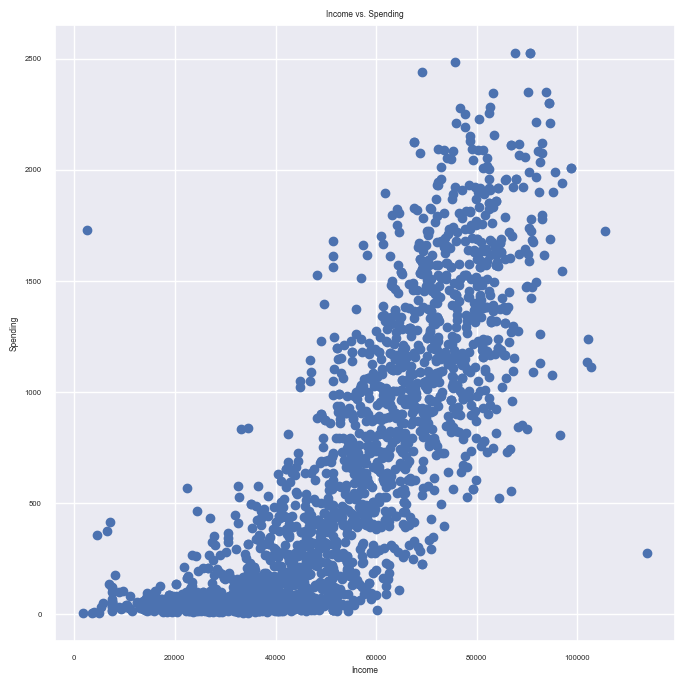

In [96]:
#Plot illustrating the effect of income on spending
plt.figure(figsize=(8, 8))
plt.scatter(df['income'], df['spending'])
plt.title('Income vs. Spending')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

<AxesSubplot:xlabel='dependents', ylabel='spending'>

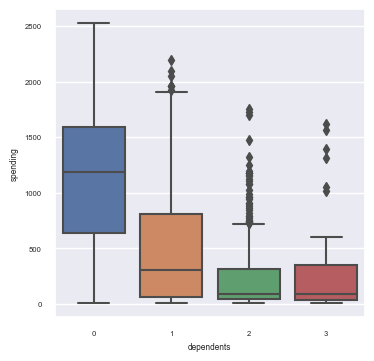

In [97]:
#Plot illustrating negative effect of having dependents (kids & teens) on spending
plt.figure(figsize=(4,4))
sns.boxplot(x='dependents', y='spending', data=df)

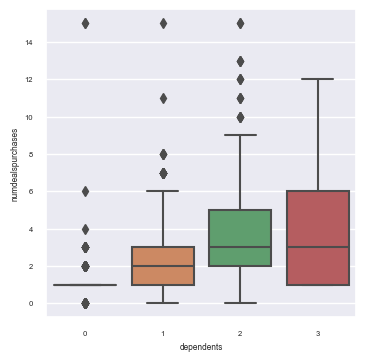

In [98]:
#Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased
plt.figure(figsize=(4,4))
sns.boxplot(x='dependents', y='numdealspurchases', data=df);

In [99]:
#REMOVING SPENDING AND TOTAL PURCHASE to check Multicolinearity

In [100]:
corr_de = df_num.drop(['spending', 'total_purchases'], axis=1)

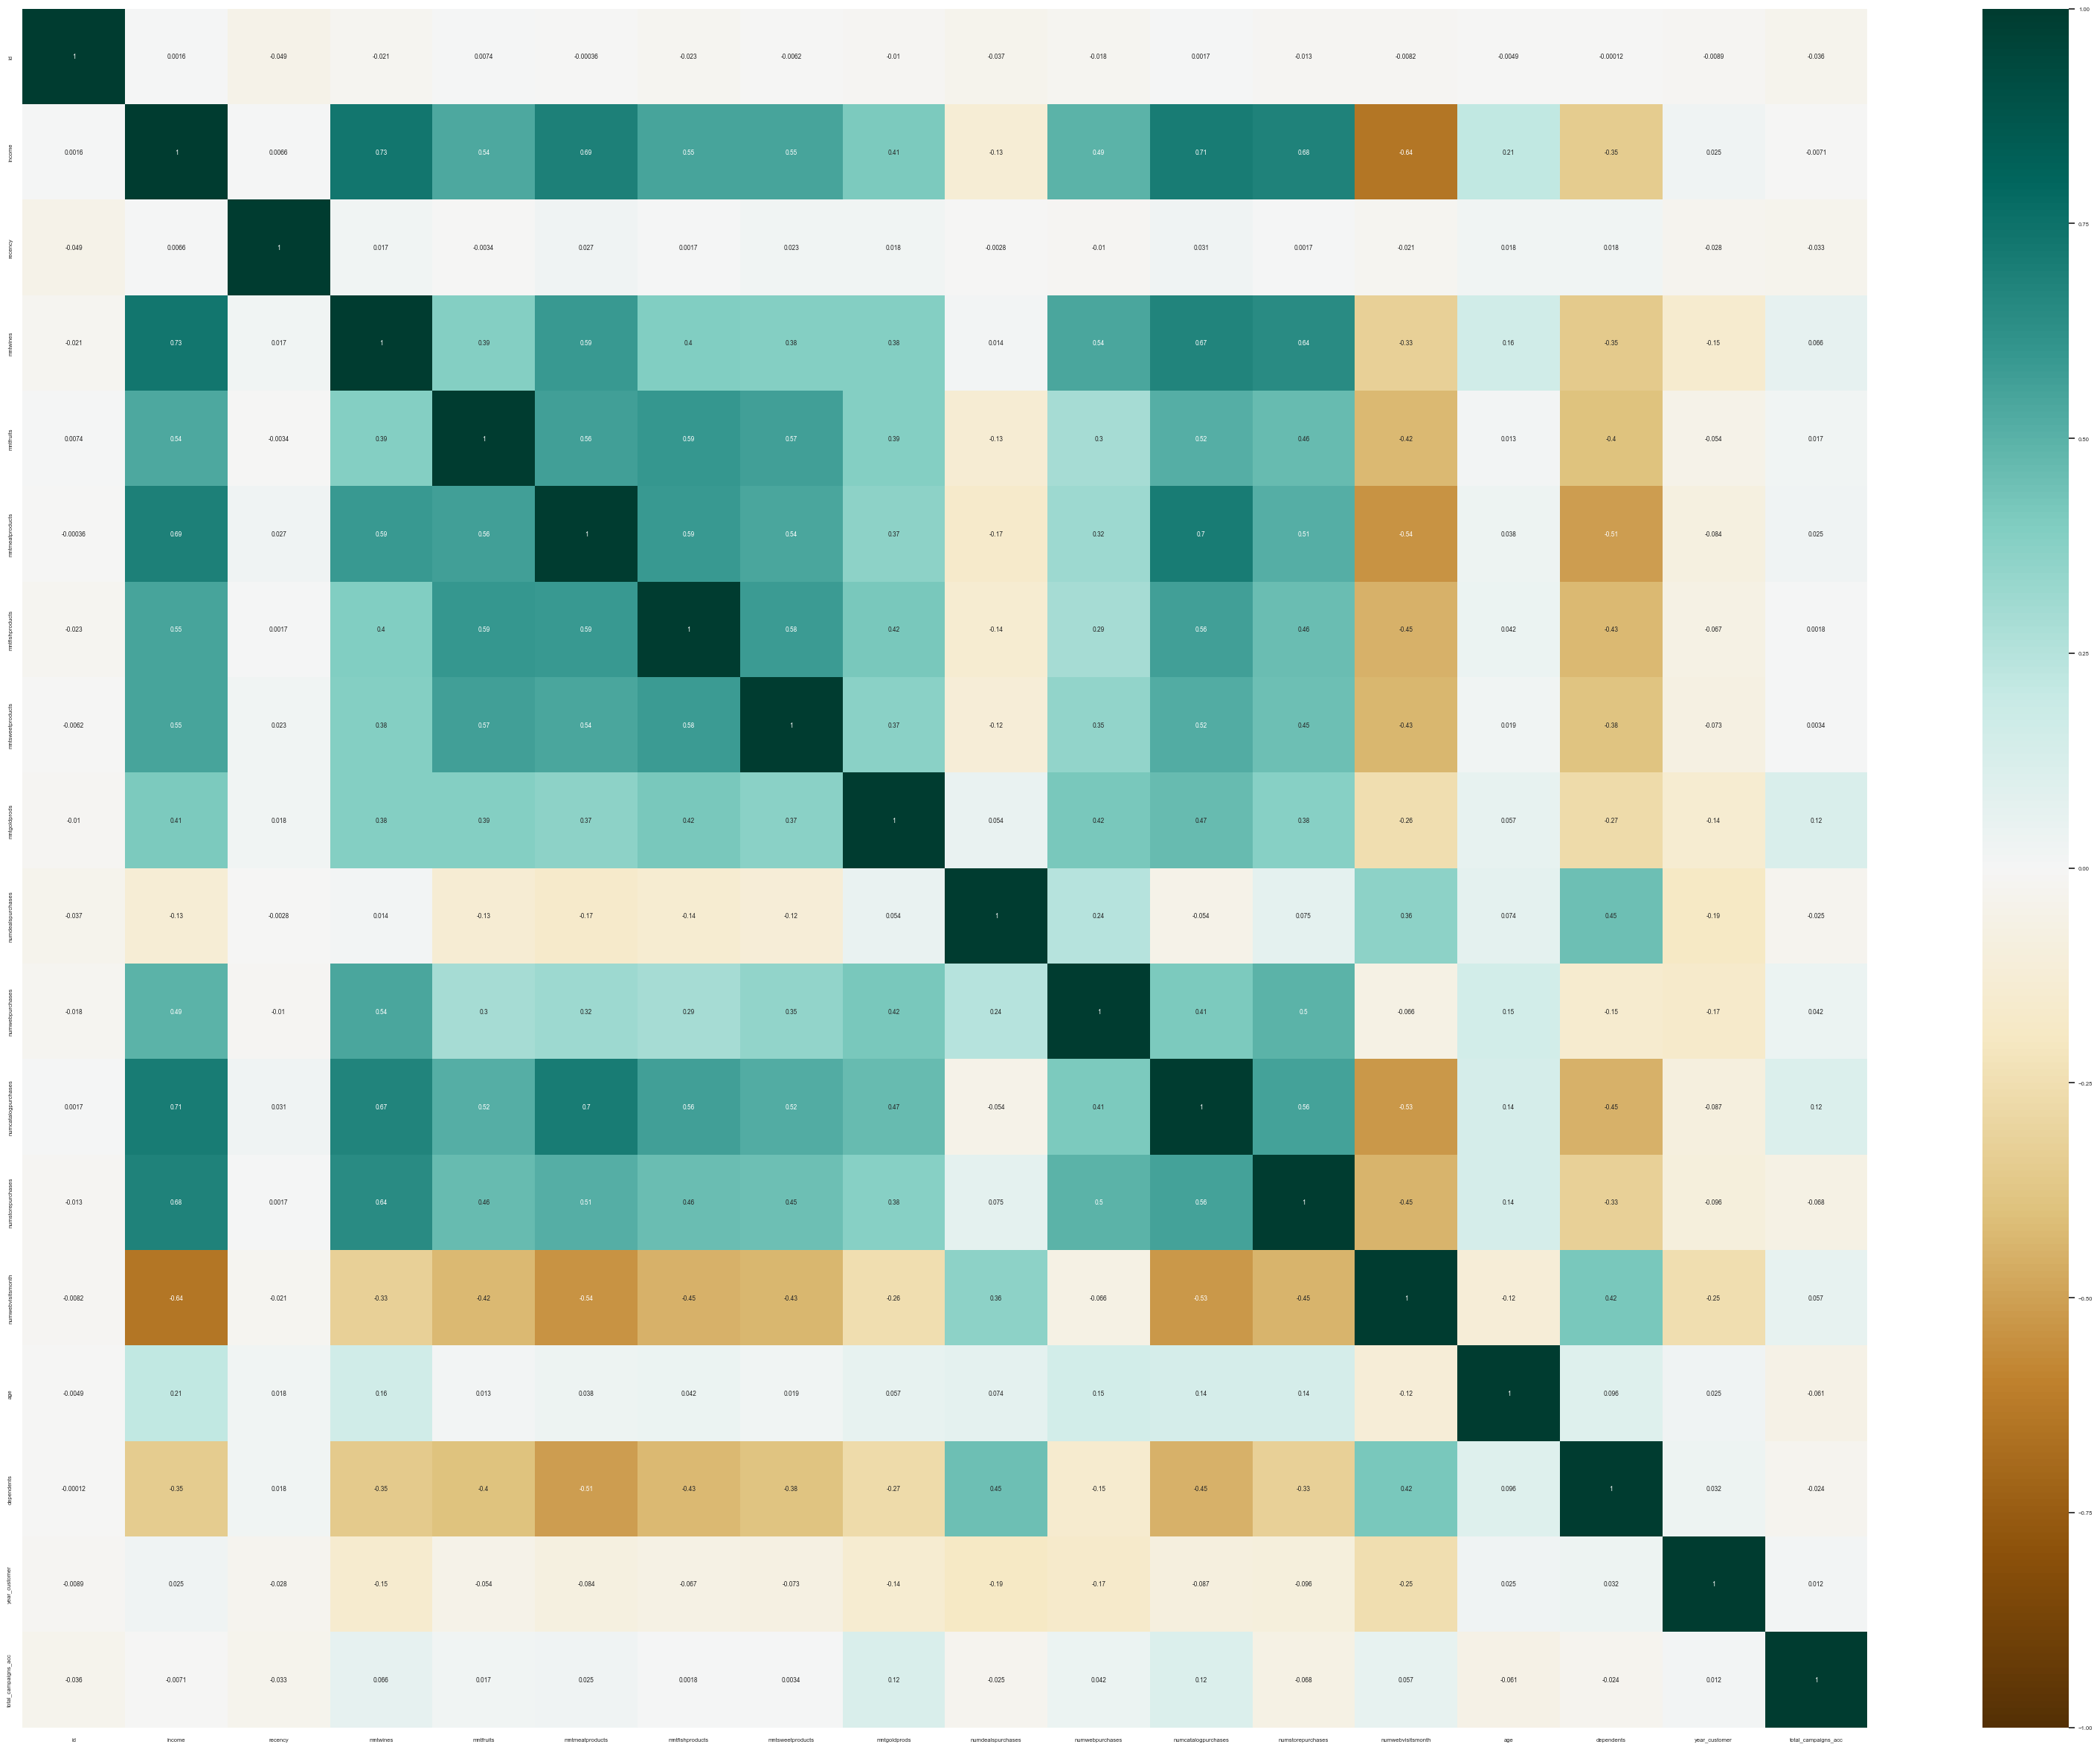

In [101]:
fig, ax = plt.subplots(figsize=(40,30)  )
heatmap = sns.heatmap(corr_de.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Segmentation of Customers

### Choosing columsn for segmentation

I  choose the spending and income variables because they provide interesting information for the segmentation. 

In [136]:
df_num.head(2)

,id,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,spending,dependents,year_customer,total_purchases,total_campaigns_acc
0,1826,84835.0,0,189,104,379,111,189,218,1,4,4,6,1,53,1190,0,2014,15,1.0
1,1,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,62,577,0,2014,18,11.0


In [137]:
cluster = df_num.iloc[:,[1,15,]]

#income
#recency, mntwines	mntfruits	mntmeatproducts	mntfishproducts	mntsweetproducts	mntgoldprods	numdealspurchases	numwebpurchases	numcatalogpurchases	numstorepurchases numwebvisitsmonth	age	spending,total_purchases

In [135]:
cluster

1

Standardizing numerical data with standard scaler

In [105]:
#scaler = StandardScaler()

#cluster_encoded = scaler.fit_transform(cluster)

In [106]:
#cluster_encoded 

In [138]:
scaler = MinMaxScaler()
cluster_encoded= scaler.fit_transform(cluster)
cluster_encoded

array([[0.74198243, 0.4702381 ],
       [0.49427699, 0.22698413],
       [0.58513089, 0.09761905],
       ...,
       [0.3980215 , 0.12063492],
       [0.57220278, 0.5468254 ],
       [0.83158637, 0.42579365]])

In [108]:
cluster_encoded.shape

(2229, 2)

Choosing the number of clusters
WCSS  ->  Within Clusters Sum of Squares

In [109]:
## finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(cluster_encoded)

  wcss.append(kmeans.inertia_)

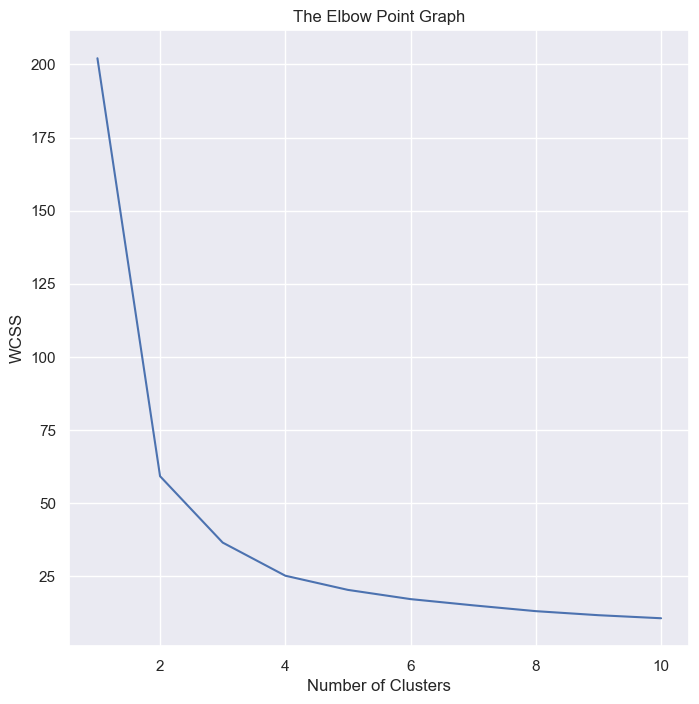

In [110]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 4   
Training the k-Means Clustering Model

In [111]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(cluster_encoded)

print(Y)

[3 2 2 ... 2 3 3]


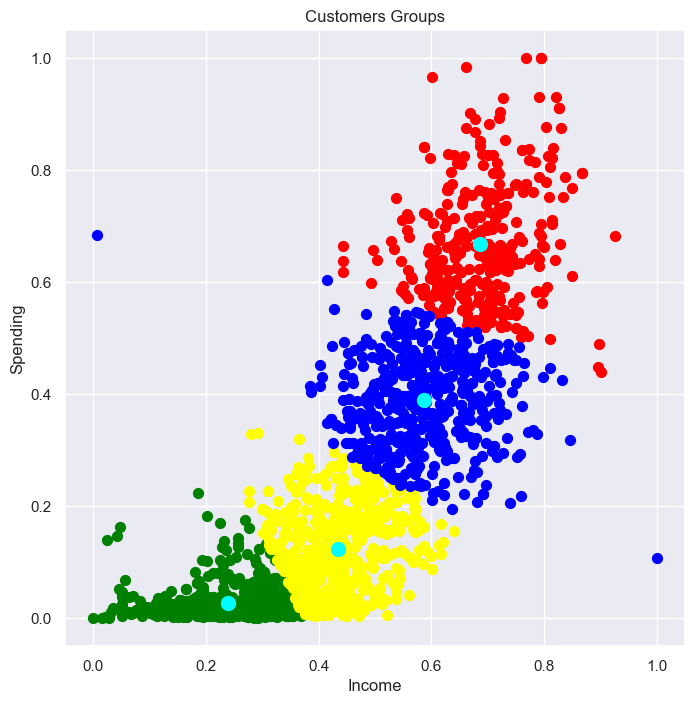

In [112]:
#Visualization
plt.figure(figsize=(8,8))
plt.scatter(cluster_encoded[Y==0,0 ], cluster_encoded[Y==0,1 ], s=50, c='green', label='Cluster 1')
plt.scatter(cluster_encoded[Y==1,0 ], cluster_encoded[Y==1,1 ], s=50, c='red', label='Cluster 2')
plt.scatter(cluster_encoded[Y==2,0 ], cluster_encoded[Y==2,1 ], s=50, c='yellow', label='Cluster 3')
plt.scatter(cluster_encoded[Y==3,0 ], cluster_encoded[Y==3,1 ], s=50, c='blue', label='Cluster 4')
                      

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')




# Configura las etiquetas de los ejes y el título de la gráfica
plt.ylabel('Spending')
plt.xlabel('Income')
plt.title('Customers Groups')

# Muestra la gráfica
plt.show()

In [113]:
kmeans.labels_

array([3, 2, 2, ..., 2, 3, 3])

In [114]:
cluster_1_data = cluster_encoded[Y == 0]
cluster_1_data

array([[0.2744902 , 0.00238095],
       [0.17627942, 0.03412698],
       [0.22447413, 0.0265873 ],
       ...,
       [0.16427985, 0.01150794],
       [0.16427985, 0.01150794],
       [0.26182993, 0.01984127]])

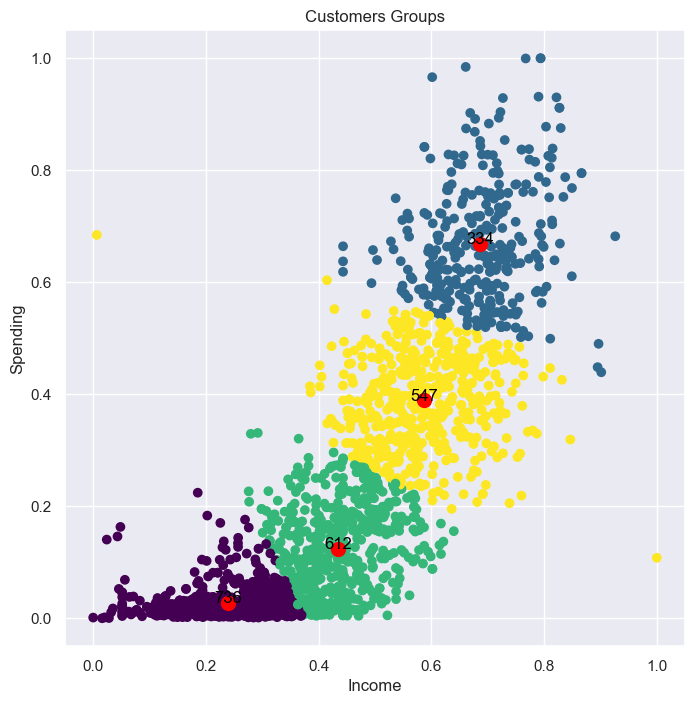

In [115]:

# Aplica K-means para obtener los clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(cluster_encoded)

# Obtiene las etiquetas asignadas a cada cliente
labels = kmeans.labels_

# Cuenta la cantidad de clientes en cada cluster
conteo_clientes = pd.Series(labels).value_counts()

# Grafica los grupos de clientes por ingresos y gastos
plt.figure(figsize=(8, 8))
plt.scatter(cluster_encoded[:, 0], cluster_encoded[:, 1], c=labels, cmap='viridis')

# Grafica los centroides de los clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')

# Configura las etiquetas de los ejes y el título de la gráfica
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Customers Groups')



# Muestra la cantidad de clientes en cada cluster
for cluster, count in conteo_clientes.items():
    centroid = kmeans.cluster_centers_[cluster]
    plt.text(centroid[0], centroid[1], f'{count}', fontsize=12, color='black', ha='center')

# Muestra la gráfica
plt.show()

I create a copy of the original dataframe and assign the labels to it to be able to filter the rows for each label and analyze the customer groups


In [139]:
cluster2 = cluster.copy()

In [140]:
cluster2['cluster_labels'] = kmeans.labels_
cluster2

,income,spending,cluster_labels
0,84835.0,1190,3
1,57091.0,577,2
2,67267.0,251,2
3,32474.0,11,0
4,21474.0,91,0
...,...,...,...
2232,66476.0,689,3
2233,31056.0,55,0
2234,46310.0,309,2
2235,65819.0,1383,3


In [141]:
# Filtrar las filas por los valores de cluster_labels
cluster_0 = cluster2.loc[cluster2['cluster_labels'] == 0]
cluster_1 = cluster2.loc[cluster2['cluster_labels'] == 1]
cluster_2 = cluster2.loc[cluster2['cluster_labels'] == 2]
cluster_3 = cluster2.loc[cluster2['cluster_labels'] == 3]

# Imprimir los resultados
print("Cluster 0:")
print(cluster_0)
print()

print("Cluster 1:")
print(cluster_1)
print()

print("Cluster 2:")
print(cluster_2)
print()

print("Cluster 3:")
print(cluster_3)

Cluster 0:
       income  spending  cluster_labels
3     32474.0        11               0
4     21474.0        91               0
13    26872.0        72               0
14     4428.0       359               0
17    32173.0        22               0
...       ...       ...             ...
2220   7500.0       100               0
2226  42231.0        37               0
2227  20130.0        34               0
2228  20130.0        34               0
2233  31056.0        55               0

[736 rows x 3 columns]

Cluster 1:
       income  spending  cluster_labels
31    79529.0      1638               1
35    95169.0      1901               1
38    84865.0      1688               1
41    66465.0      1485               1
45    64260.0      1574               1
...       ...       ...             ...
2205  84906.0      1631               1
2206  84906.0      1631               1
2210  90687.0      1779               1
2216  83273.0      1392               1
2217  81702.0      1633          

In [142]:

#Converting clusters to dataframe

cluster_0_df = pd.DataFrame(cluster_0)
cluster_1_df = pd.DataFrame(cluster_1)
cluster_2_df = pd.DataFrame(cluster_2)
cluster_3_df = pd.DataFrame(cluster_3)

In [143]:
cluster_0_df

,income,spending,cluster_labels
3,32474.0,11,0
4,21474.0,91,0
13,26872.0,72,0
14,4428.0,359,0
17,32173.0,22,0
...,...,...,...
2220,7500.0,100,0
2226,42231.0,37,0
2227,20130.0,34,0
2228,20130.0,34,0


In [144]:
cluster_0_df.shape

(736, 3)

In [145]:
cluster_0_df.describe()

,income,spending,cluster_labels
count,736.000000,736.000000,736.0
mean,28541.343750,72.880435,0.0
std,8635.690514,69.255511,0.0
min,1730.000000,5.000000,0.0
25%,22678.750000,32.000000,0.0
50%,29968.500000,53.500000,0.0
75%,35528.250000,84.000000,0.0
max,43269.000000,570.000000,0.0


## As a data analyst, looking at the Cluster 1 of customer segmentation, cluster_0_df,  we can make the following conclusions:   

- Cluster size: 736 clients.   

- Average income: The average income of clients in this cluster is approximately 28,541$   

- Average expenses: Clients in this cluster have an average expense of around 72.88$.   

- Variability: There is considerable variability in the income and expenses of clients in this cluster, as indicated by the standard deviation. This suggests that there are clients with different levels of income and expenses within the cluster.   

- Range of income and expenses: The range of income goes from 1,730$ to 43,269$, while the range of expenses goes from 5$ to 570$ monetary units.   

- Distribution of income and expenses: The median (central value) of income is approximately 29,968$, which means that half of the clients have incomes above this value and the other half have incomes below this value. The median of the expenses is approximately 53$.   

- Low Spend Segment: This cluster can be considered as a segment of customers with low spending levels, since the average spend is relatively low compared to the other clusters.   

- With these conclusions, we can infer that this group of clients has relatively low income and expenses compared to the other clusters. This may indicate a customer profile with lower spending capacity or more conservative consumption preferences. These observations can be useful for the marketing team in targeting their strategies and campaigns more effectively towards this customer segment, for example, by offering affordable products or services and promotions tailored to their level of spending.   

## CLUSTER 2 CONCLUSIONS

In [146]:
cluster_1_df.shape

(334, 3)

In [147]:
cluster_1_df.describe()

,income,spending,cluster_labels
count,334.000000,334.000000,334.0
mean,78690.004491,1688.784431,1.0
std,8955.332848,272.797511,0.0
min,51381.500000,1112.000000,1.0
25%,72270.750000,1479.750000,1.0
50%,79414.500000,1634.000000,1.0
75%,83842.250000,1865.750000,1.0
max,105471.000000,2525.000000,1.0


- Cluster size: 334 clients.
- Average income: The average income of clients in Cluster 1 is approximately 78,690$. This suggests that the customers in this cluster have relatively higher income levels compared to Cluster 0.      
- Average expenses: The average expenses of clients in Cluster 1 amount to around 1,688$. This indicates that the customers in this segment tend to have higher spending levels compared to Cluster 0.      
- Variability: The standard deviation for both income and expenses within Cluster 1 suggests a moderate degree of variability. This implies that there are clients with varying income and spending patterns within this cluster.   
- Range of income and expenses: The range of income in Cluster 1 spans from 51,381$ to 105,471$ while the range of expenses ranges from 1.112$ to 2,525$. This wide range indicates the presence of customers with different income and spending levels within this cluster.   
- Distribution of income and expenses: The median income of clients in Cluster 1 is approximately 79,414$. This suggests that half of the clients have an income below this value, while the other half has an income above it.   

- Overall, Cluster 1 represents a segment of customers with relatively higher income and spending levels compared to Cluster 0. These customers may have a higher purchasing power and exhibit more liberal spending behavior. The marketing department can leverage these insights to develop strategies and campaigns that cater to this customer segment. For example, they can focus on offering premium products or services, creating promotions that align with the customers' higher spending capacity, and delivering messaging that resonates with their more indulgent consumption preferences.   

## CLUSTER 3 CONCLUSIONS

In [148]:
cluster_2_df.shape

(612, 3)

In [149]:
cluster_2_df.describe()

,income,spending,cluster_labels
count,612.000000,612.000000,612.0
mean,50399.556373,315.490196,2.0
std,7572.817956,190.461525,0.0
min,32632.000000,16.000000,2.0
25%,44767.750000,147.750000,2.0
50%,49973.500000,307.500000,2.0
75%,55305.250000,455.750000,2.0
max,73395.000000,839.000000,2.0


- Cluster size: 612 clients.       
- Average income: The average income of clients in Cluster 3 is approximately 50,399$.       
- Average expenses: Clients in Cluster 3 have an average expense of around 315$. This indicates that the customers in this segment tend to have moderate spending levels than Cluster 2.      
- Variability: The standard deviation for both income and expenses within Cluster 2 suggests a moderate degree of variability. This implies that there are clients with different income and spending patterns within this cluster.   
- Range of income and expenses: The range of income in Cluster 3 spans from 32,632$ to 73,395$ while the range of expenses ranges from 16$ to 839$. This wide range indicates the presence of customers with varying income and spending levels within this cluster.   
- Distribution of income and expenses: The median income of clients in Cluster 2 is approximately 49,973$.       

From this analysis, we can conclude that Cluster 3 represents a segment of customers with a moderate income level and moderate spending behavior. These customers may have a balanced approach to their finances and exhibit stable spending patterns. The marketing department can consider targeting this customer segment with products or services that align with their moderate income and spending capacity. They can also focus on providing value-based offerings and promotions that cater to their stable spending behavior.   

## CLUSTER 4 CONCLUSIONS

In [150]:
cluster_3_df.shape

(547, 3)

In [151]:
cluster_3_df.describe()

,income,spending,cluster_labels
count,547.000000,547.000000,547.0
mean,67507.232176,985.332724,3.0
std,9879.242251,206.307558,0.0
min,2447.000000,277.000000,3.0
25%,61194.500000,824.000000,3.0
50%,66886.000000,988.000000,3.0
75%,74279.000000,1150.000000,3.0
max,113734.000000,1730.000000,3.0


- Cluster size: 547 clients.   
- Average income: 67,507.23$.   
- Average expenses: Clients in Cluster 3 have an average expense of around 985$.   
- Variability: The standard deviation for both income and expenses within Cluster 3 indicates a moderate degree of variability, suggesting that there are clients with different income and spending patterns within this cluster.   
- Range of income and expenses: The range of income in Cluster 3 spans from 2,447$ to 113,734$ while the range of expenses ranges from 277$ to 1,730$.   
- Distribution of income and expenses: The median income of clients in Cluster 3 is approximately 66,886$ 


Based on this analysis, we can conclude that Cluster 3 represents a segment of clients with a relatively higher average income and higher spending levels compared to other clusters. These clients may have a higher spending capacity and may be more inclined towards making larger purchases. The marketing department can consider targeting this customer segment with higher-end products or services, luxury offerings, or personalized marketing campaigns that cater to their higher spending power.

# Answer the following questions of the CMO:

## What does the Average customer look like for our company?

In [152]:
selected_columns = ['age', 'year_customer', 'income', 'dependents', 'recency']
selected_data = df[selected_columns]
mean_values = selected_data.mean().round(1)
mean_df = pd.DataFrame(mean_values, columns=['Mean'])
mean_df.index.name = 'Variable'
mean_df.columns = ['Average Customer']
mean_df.index = mean_df.index.rename('Characteristics')
mean_df

,Average Customer
Characteristics,
age,54.1
year_customer,2013.0
income,51619.5
dependents,1.0
recency,49.1


## What Products are best performing?

Wines Followed by meats

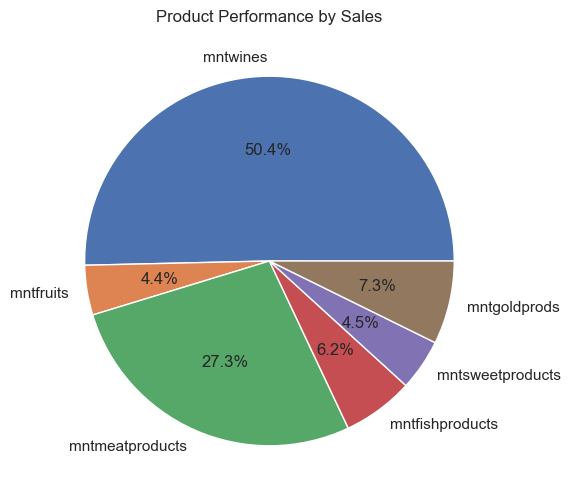

In [153]:
# Calcular la suma de las ventas de cada producto
sales = df[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']].sum()

# Crear el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(sales, labels=sales.index, autopct='%1.1f%%')

# Configurar el título
plt.title('Product Performance by Sales')

# Mostrar el gráfico
plt.show()

## Which channels are underperforming?

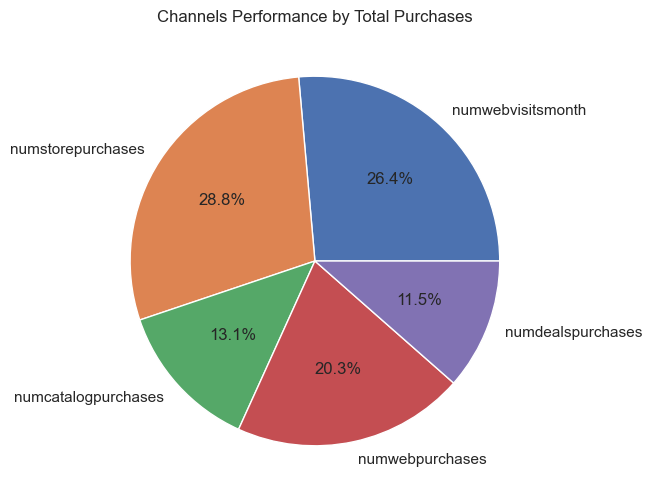

In [154]:
# Seleccionar las columnas de interés
channels = df[['numwebvisitsmonth', 'numstorepurchases', 'numcatalogpurchases', 'numwebpurchases', 'numdealspurchases']]

# Calcular la suma de cada canal
channel_purchases = channels.sum()

# Calcular el porcentaje de compras de cada canal
total_purchases = df['total_purchases'].sum()
channel_performance = (channel_purchases / total_purchases) * 100

# Crear el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(channel_performance, labels=channel_performance.index, autopct='%1.1f%%')

# Configurar el título
plt.title('Channels Performance by Total Purchases')

# Mostrar el gráfico
plt.show()

## Which Marketing Campaigns were most successful?

The most successful campaign is the most recent (column name: Response)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


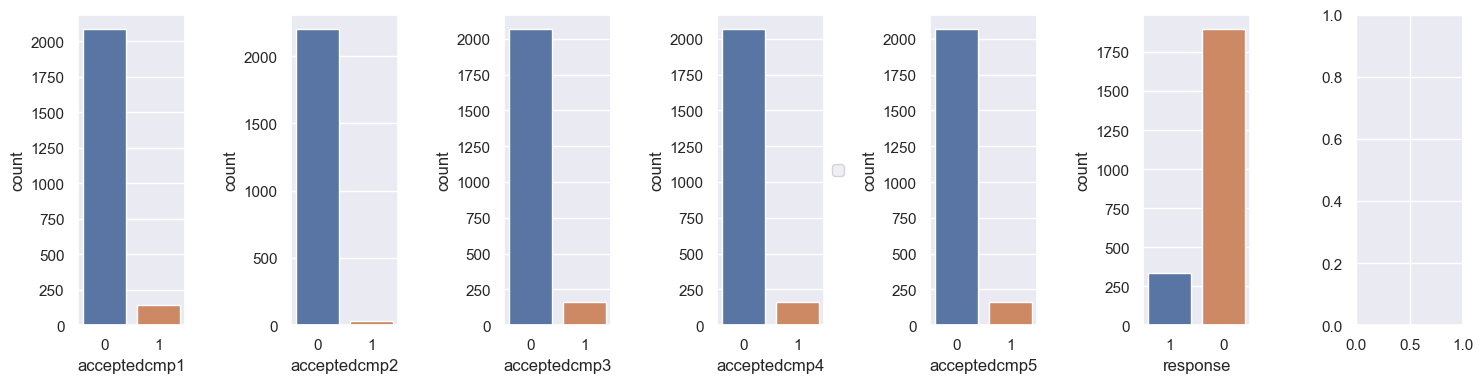

In [155]:
fig, ax = plt.subplots(1, 7, figsize=(15, 4))

sns.countplot(x=df_cat['acceptedcmp1'], ax=ax[0])
sns.countplot(x=df_cat['acceptedcmp2'], ax=ax[1])
sns.countplot(x=df_cat['acceptedcmp3'], ax=ax[2])
sns.countplot(x=df_cat['acceptedcmp4'], ax=ax[3])
sns.countplot(x=df_cat['acceptedcmp5'], ax=ax[4])
sns.countplot(x=df_cat['response'], ax=ax[5])

ax[3].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

## Purchase amount spending prediction: Spending/Income

In [156]:
cluster

,income,spending
0,84835.0,1190
1,57091.0,577
2,67267.0,251
3,32474.0,11
4,21474.0,91
...,...,...
2232,66476.0,689
2233,31056.0,55
2234,46310.0,309
2235,65819.0,1383


In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

#X-y split 
Y=cluster['spending']
X=cluster.drop('spending',axis=1)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [159]:
# Normalizar los datos en X_train y X_test usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [160]:
# Crear y ajustar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [161]:
# Realizar las predicciones en conjunto de entrenamiento y conjunto de prueba
y_train_pred = regression_model.predict(X_train_scaled)
y_test_pred = regression_model.predict(X_test_scaled)


In [162]:
# Calcular las métricas en conjunto de entrenamiento
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)

In [163]:
# Calcular las métricas en conjunto de prueba
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)


In [164]:
# Imprimir las métricas
print("Métricas en conjunto de entrenamiento:")
print("R^2:", r2_train)
print("MSE:", mse_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)
print("------------------------------")
print("Métricas en conjunto de prueba:")
print("R^2:", r2_test)
print("MSE:", mse_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)

Métricas en conjunto de entrenamiento:
R^2: 0.6784919073987676
MSE: 118045.350349332
MAE: 268.46887171988595
RMSE: 343.57728439076413
------------------------------
Métricas en conjunto de prueba:
R^2: 0.6469237899197506
MSE: 118895.62031097068
MAE: 267.66162931031494
RMSE: 344.8124422218124


## Purchase amount spending prediction with other variables

In [165]:
df_cat

,education,marital_status,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
0,Graduation,single,0,0,0,0,0,1,0,SP
1,Graduation,single,0,0,0,0,1,1,0,CA
2,Graduation,couple,0,0,0,0,0,0,0,US
3,Graduation,couple,0,0,0,0,0,0,0,AUS
4,Graduation,single,1,1,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...
2232,PhD,single,0,0,0,0,0,0,0,US
2233,2n Cycle,couple,0,0,0,0,0,0,0,SP
2234,Graduation,single,0,0,0,0,0,0,0,SP
2235,Graduation,couple,0,0,0,0,0,0,0,IND


In [166]:
df_cat_l=df_cat[['education', 'marital_status', 'country']]
df_cat_l= df_cat_l.reset_index()
df_cat_l = df_cat_l.drop(columns=['index'])
df_cat_l

,education,marital_status,country
0,Graduation,single,SP
1,Graduation,single,CA
2,Graduation,couple,US
3,Graduation,couple,AUS
4,Graduation,single,SP
...,...,...,...
2224,PhD,single,US
2225,2n Cycle,couple,SP
2226,Graduation,single,SP
2227,Graduation,couple,IND


In [167]:
#Encodign categorical data 
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first').fit(df_cat_l)
encoder=encoder.transform(df_cat_l).toarray()
encoder

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [168]:
df_num

,id,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,spending,dependents,year_customer,total_purchases,total_campaigns_acc
0,1826,84835.0,0,189,104,379,111,189,218,1,4,4,6,1,53,1190,0,2014,15,1.0
1,1,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,62,577,0,2014,18,11.0
2,10476,67267.0,0,134,11,59,15,2,30,1,3,2,5,2,65,251,1,2014,11,0.0
3,1386,32474.0,0,10,0,1,0,0,0,1,1,0,2,7,56,11,2,2014,4,0.0
4,5371,21474.0,0,6,16,24,11,0,34,2,3,1,2,7,34,91,1,2014,8,110001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,10142,66476.0,99,372,18,126,47,48,78,2,5,2,11,4,47,689,1,2013,20,0.0
2233,5263,31056.0,99,5,10,13,3,8,16,1,1,0,3,8,46,55,1,2013,5,0.0
2234,22,46310.0,99,185,2,88,15,5,14,2,6,1,5,8,47,309,1,2012,14,0.0
2235,528,65819.0,99,267,38,701,149,165,63,1,5,4,10,3,45,1383,0,2012,20,0.0


In [169]:
df_num_l=df_num[['income', 'numdealspurchases',	'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases','numwebvisitsmonth', 'age', 'dependents', 'spending']]
df_num_l= df_num_l.reset_index()
df_num_l = df_num_l.drop(columns=['index'])
df_num_l

,income,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,dependents,spending
0,84835.0,1,4,4,6,1,53,0,1190
1,57091.0,1,7,3,7,5,62,0,577
2,67267.0,1,3,2,5,2,65,1,251
3,32474.0,1,1,0,2,7,56,2,11
4,21474.0,2,3,1,2,7,34,1,91
...,...,...,...,...,...,...,...,...,...
2224,66476.0,2,5,2,11,4,47,1,689
2225,31056.0,1,1,0,3,8,46,1,55
2226,46310.0,2,6,1,5,8,47,1,309
2227,65819.0,1,5,4,10,3,45,0,1383


In [170]:
#X-y split 
y=df_num_l['spending']
X=df_num_l.drop(['spending'],axis=1)
X

,income,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,dependents
0,84835.0,1,4,4,6,1,53,0
1,57091.0,1,7,3,7,5,62,0
2,67267.0,1,3,2,5,2,65,1
3,32474.0,1,1,0,2,7,56,2
4,21474.0,2,3,1,2,7,34,1
...,...,...,...,...,...,...,...,...
2224,66476.0,2,5,2,11,4,47,1
2225,31056.0,1,1,0,3,8,46,1
2226,46310.0,2,6,1,5,8,47,1
2227,65819.0,1,5,4,10,3,45,0


In [171]:
# Normalizar datos numéricos utilizando StandardScaler
scaler = StandardScaler()
X_es = scaler.fit_transform(X)
X_es

array([[ 1.6126693 , -0.69656739, -0.03605431, ..., -1.79512893,
        -0.09494056, -1.26627659],
       [ 0.2656505 , -0.69656739,  1.04508986, ..., -0.13842988,
         0.67397452, -1.26627659],
       [ 0.75971276, -0.69656739, -0.3964357 , ..., -1.38095417,
         0.93027955,  0.06385089],
       ...,
       [-0.25778554, -0.1688146 ,  0.68470847, ...,  1.10409441,
        -0.60755062,  0.06385089],
       [ 0.68940988, -0.69656739,  0.32432708, ..., -0.96677941,
        -0.77842064, -1.26627659],
       [ 2.09993432, -0.69656739,  1.40547125, ...,  0.68991965,
        -0.00950556,  1.39397838]])

In [172]:
X=np.concatenate((X_es ,encoder),axis=1)
X

array([[ 1.6126693 , -0.69656739, -0.03605431, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.2656505 , -0.69656739,  1.04508986, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75971276, -0.69656739, -0.3964357 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.25778554, -0.1688146 ,  0.68470847, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.68940988, -0.69656739,  0.32432708, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.09993432, -0.69656739,  1.40547125, ...,  0.        ,
         0.        ,  0.        ]])

In [173]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [174]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.61140256, -0.68389372, -1.11115159, ..., -0.41585133,
        -0.96225045, -0.22786351],
       [ 0.70526191,  0.33801644,  1.75100978, ..., -0.41585133,
         1.03923048, -0.22786351],
       [ 0.14579357,  0.84897152, -0.39561125, ..., -0.41585133,
        -0.96225045, -0.22786351],
       ...,
       [-0.15850648, -0.68389372, -1.11115159, ..., -0.41585133,
         1.03923048, -0.22786351],
       [ 1.10278267, -0.68389372, -0.03784108, ...,  2.40470553,
        -0.96225045, -0.22786351],
       [ 0.82513769, -0.68389372,  1.75100978, ..., -0.41585133,
        -0.96225045, -0.22786351]])

In [175]:
# Crear y ajustar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [176]:
# Realizar las predicciones en conjunto de entrenamiento y conjunto de prueba
y_train_pred = regression_model.predict(X_train_scaled)
y_test_pred = regression_model.predict(X_test_scaled)


In [177]:
# Calcular las métricas
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)

In [178]:
# Imprimir las métricas
print("Métricas en conjunto de entrenamiento:")
print("R^2:", r2_train)
print("MSE:", mse_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)
print("---------------------------")
print("Métricas en conjunto de prueba:")
print("R^2:", r2_test)
print("MSE:", mse_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)

Métricas en conjunto de entrenamiento:
R^2: 0.8156524015032155
MSE: 68735.41992095124
MAE: 188.13034539025102
RMSE: 262.1744074484602
---------------------------
Métricas en conjunto de prueba:
R^2: 0.8082373964076417
MSE: 63965.346222295244
MAE: 178.48083942988046
RMSE: 252.91371299772428


## Prediction removing income of last prediciton

In [179]:
df_num_l=df_num[['numdealspurchases',	'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases','numwebvisitsmonth', 'age', 'dependents', 'spending']]
df_num_l= df_num_l.reset_index()
df_num_l = df_num_l.drop(columns=['index'])
df_num_l

,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,dependents,spending
0,1,4,4,6,1,53,0,1190
1,1,7,3,7,5,62,0,577
2,1,3,2,5,2,65,1,251
3,1,1,0,2,7,56,2,11
4,2,3,1,2,7,34,1,91
...,...,...,...,...,...,...,...,...
2224,2,5,2,11,4,47,1,689
2225,1,1,0,3,8,46,1,55
2226,2,6,1,5,8,47,1,309
2227,1,5,4,10,3,45,0,1383


In [180]:
#X-y split 
y=df_num_l['spending']
X=df_num_l.drop(['spending'],axis=1)
X

,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,dependents
0,1,4,4,6,1,53,0
1,1,7,3,7,5,62,0
2,1,3,2,5,2,65,1
3,1,1,0,2,7,56,2
4,2,3,1,2,7,34,1
...,...,...,...,...,...,...,...
2224,2,5,2,11,4,47,1
2225,1,1,0,3,8,46,1
2226,2,6,1,5,8,47,1
2227,1,5,4,10,3,45,0


In [181]:
# Normalizar datos numéricos utilizando StandardScaler
scaler = StandardScaler()
X_es = scaler.fit_transform(X)
X_es

array([[-0.69656739, -0.03605431,  0.48770355, ..., -1.79512893,
        -0.09494056, -1.26627659],
       [-0.69656739,  1.04508986,  0.12999009, ..., -0.13842988,
         0.67397452, -1.26627659],
       [-0.69656739, -0.3964357 , -0.22772338, ..., -1.38095417,
         0.93027955,  0.06385089],
       ...,
       [-0.1688146 ,  0.68470847, -0.58543684, ...,  1.10409441,
        -0.60755062,  0.06385089],
       [-0.69656739,  0.32432708,  0.48770355, ..., -0.96677941,
        -0.77842064, -1.26627659],
       [-0.69656739,  1.40547125,  0.84541702, ...,  0.68991965,
        -0.00950556,  1.39397838]])

In [182]:
X=np.concatenate((X_es ,encoder),axis=1)
X

array([[-0.69656739, -0.03605431,  0.48770355, ...,  0.        ,
         1.        ,  0.        ],
       [-0.69656739,  1.04508986,  0.12999009, ...,  0.        ,
         0.        ,  0.        ],
       [-0.69656739, -0.3964357 , -0.22772338, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1688146 ,  0.68470847, -0.58543684, ...,  0.        ,
         1.        ,  0.        ],
       [-0.69656739,  0.32432708,  0.48770355, ...,  0.        ,
         0.        ,  0.        ],
       [-0.69656739,  1.40547125,  0.84541702, ...,  0.        ,
         0.        ,  0.        ]])

In [183]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [184]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.68389372, -1.11115159, -0.92884441, ..., -0.41585133,
        -0.96225045, -0.22786351],
       [ 0.33801644,  1.75100978,  0.85168801, ..., -0.41585133,
         1.03923048, -0.22786351],
       [ 0.84897152, -0.39561125, -0.57273793, ..., -0.41585133,
        -0.96225045, -0.22786351],
       ...,
       [-0.68389372, -1.11115159, -0.92884441, ..., -0.41585133,
         1.03923048, -0.22786351],
       [-0.68389372, -0.03784108,  0.13947504, ...,  2.40470553,
        -0.96225045, -0.22786351],
       [-0.68389372,  1.75100978,  1.56390097, ..., -0.41585133,
        -0.96225045, -0.22786351]])

In [185]:
# Crear y ajustar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [186]:
# Realizar las predicciones en conjunto de entrenamiento y conjunto de prueba
y_train_pred = regression_model.predict(X_train_scaled)
y_test_pred = regression_model.predict(X_test_scaled)

In [187]:
# Calcular las métricas
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)

In [188]:
# Imprimir las métricas
print("Métricas en conjunto de entrenamiento:")
print("R^2:", r2_train)
print("MSE:", mse_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)
print("---------------------------")
print("Métricas en conjunto de prueba:")
print("R^2:", r2_test)
print("MSE:", mse_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)

Métricas en conjunto de entrenamiento:
R^2: 0.7532939530028419
MSE: 91986.2470445113
MAE: 205.98088193206826
RMSE: 303.29234583897977
---------------------------
Métricas en conjunto de prueba:
R^2: 0.7535298353825518
MSE: 82213.8890371711
MAE: 194.52090187890965
RMSE: 286.7296445036179
